<a href="https://colab.research.google.com/github/josueir/courseracapstone/blob/master/CapstoneProjectTheBattleofNeighborhoods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project - The Battle of Neighborhoods - Week 2**

---


### By: Josue Irizarry





## Scenario and Background
Here is my history and problem to resolve, currently I am living in the south of Puerto Rico island
in a main municipality called Ponce, within 20 minutes to my work and another 20 far from my
children's school. In these areas we have some venues and attractions, such as the local
airport, cinema, fitness center, malls, international cuisine, hospitals, pharmacies and there are
not a lot of options at all. I have the interest to move to work and live in another place like San
Juan metropolitan area or Caguas municipally here in Puerto Rico, where I can have job options
and schools not far from home and security. Also more options for entertainment, cuisine,
shopping and hospital.

##Problem to resolved:

How to find a new home in Puerto Rico metropolitan area or another place in Florida with
following conditions:

* House or apartment with minimum of 3 bedrooms
* Monthly rend not to exceed US $2000 / month
* Available jobs around the area
* Schools around the new living area
* Centralized to venues and amenities like cinemas, fitness center, recreative parks malls,
spa, international cuisines, hospital and pharmacies

## Interested Audience
The audience is wide open to individuals or groups who want to take advantage of the
model, approach and data analysis used in this data science capstone project. The use of
FourSquare data and mapping techniques in conjunction with data analysis techniques will help
to resolve the project’s key questions.

## Data Requirements

Geodata for current residence in Puerto Rico with venuess established thanks to
FourSquare.
List of Puerto Rico neighborhoods with clustered venus established via Foursquare:
https://welcome.topuertorico.org/reference/zipcodes.shtml
List of apartments or houses for rent in San Juan and Caguas municipalities with
information on neighborhood location, address, number of beds, monthly rent price and
complemented with geo data.
List of schools K-12 in San Juan and Caguas municipalities
Place to work in Caguas and San Juan for reference

## Data Sources, Data Processing and Tools used

Puerto Rico data map is to be created with help of tools: Nominatim, Foursquare and
Folium mapping
Neighborhoods are being obtained from Wikipedia and other available websites with
geodata via Nominatim for mapping for Folium.
List of Schools stations was obtained via Wikipedia and Google map.
List of apartments or houses will be obtained from Internet information from Zillow.com
or ClasificadosOnline. The geolocation (lat, long) will be obtained using Nominatim.
Folium maps will be using the consolidated all the data in One map, where it is possible
to visualize the insight to help with decisions of a new place to move.

## Methodology

### Data Acquisition and Cleaning

Data will be collected from different sources:

*   Foursquare be used to locate the releate vnues 
*   Latitude and Longitude information from https://zipcode.org/city/PR
*   Gym information from yelp.com
*   School information from https://www.publicschoolreview.com
*   Jobs information from https://www.monster.com/
*   House / Appartments information from https://www.realtor.com/apartments/
*   Puerto Rico poblation from http://electionspuertorico.org
*   Using Python libraries like sklearn and pandas for visualization and clustering 





In [ ]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests
from math import sin, cos, sqrt, atan2, radians
import folium 
import matplotlib.pyplot as plt

#### Obtain the CSV file to build up the  dataframe consisted of 4 columns namely Borough, Neighborhood, Latitude and Longitude

In [ ]:
url="https://github.com/josueir/capstone_project_notebook/blob/master/metropr.csv"
df_metropr = pd.read_html(url)[0]
df_metropr.drop(df_metropr.columns[0], axis=1, inplace=True)
df_metropr.shape

(52, 4)

#### Obtain the CSV file to build up the  dataframe consisted of 4 columns namely Borough, Neighborhood, Latitude and Longitude

In [ ]:
df_metropr.value_counts()

Borough   Neighborhood               Latitude  Longitude
San Juan  Universidad                18.4081   -66.0449     1
          Tortugo                    18.3423   -66.0925     1
Carolina  Barrazas                   18.3198   -65.9334     1
Caguas    Turabo                     18.2025   -66.0523     1
          Tomás de Castro            18.2088   -66.0166     1
          San Salvador               18.1359   -66.0523     1
          San Antonio                18.3031   -66.0374     1
          Río Cañas                  18.2801   -66.0523     1
          Pueblo                     18.2388   -66.0352     1
          Cañabón                    18.2405   -66.0672     1
          Cañaboncito                18.2116   -66.0727     1
          Borirquen                  18.2341   -66.0432     1
          Beatriz                    18.1723   -66.0761     1
          Bairoa                     18.2659   -66.0285     1
Bayamon   Santa Olaya                18.3180   -66.1713     1
          Páj

In [ ]:
url="https://github.com/josueir/capstone_project_notebook/blob/master/venues_rating.csv"
df_venues_rating = pd.read_html(url)[0]
df_venues_rating.drop(df_venues_rating.columns[[0,1]], axis=1, inplace=True)
print (df_venues_rating.shape)
df_venues_rating.columns

(49, 4)


Index(['ID', 'Name', 'Likes', 'Rating'], dtype='object')

In [ ]:
# Obtain Borough information including zip codes
url="https://github.com/josueir/capstone_project_notebook/blob/master/zipcode_output.csv"
datos_zipcode = pd.read_html(url)[0]
datos_zipcode.drop(datos_zipcode.columns[0], axis=1, inplace=True)
datos_zipcode.drop(datos_zipcode.columns[0], axis=1, inplace=True)
datos_zipcode.zipcode = datos_zipcode['zipcode'].astype(str).str.zfill(5)
datos_zipcode

,Borough,zipcode,Latitude,Longitude
0,Bayamon,00956,18.323022,-66.172992
1,Bayamon,00957,18.367240,-66.185126
2,Bayamon,00958,18.400800,-66.158900
3,Bayamon,00959,18.392506,-66.158212
4,Bayamon,00960,18.393064,-66.154817
5,Bayamon,00961,18.413087,-66.161162
6,Caguas,00725,18.205646,-66.034458
7,Caguas,00726,18.236400,-66.048900
8,Caguas,00727,18.216710,-66.055275
9,Carolina,00981,18.468300,-66.106400


In [ ]:
# Describe Method for df_metropr dataframe
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
df_metropr.describe()

,Latitude,Longitude
count,52.000000,52.000000
mean,18.344242,-66.058523
std,0.078234,0.079701
min,18.135900,-66.221800
25%,18.300500,-66.110300
50%,18.360400,-66.052300
75%,18.397375,-66.013625
max,18.468000,-65.918500


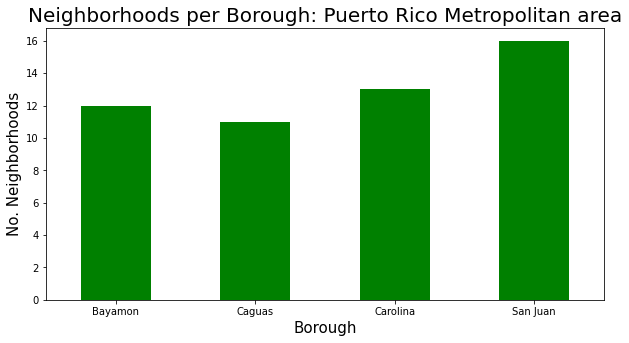

In [ ]:
clr = "green"
df_metropr.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: Puerto Rico Metropolitan area', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [ ]:
CLIENT_ID = '1X40I1UAYQVJRHE5JL5T0UTSOQO4JKHF5HDXBXPA2AXEA5QF' # your Foursquare ID
CLIENT_SECRET = 'YCDGIKUDA4MX322QZEFNH5QGUXQTH2NE2JS5M5VCONTVRVMI'
VERSION = '20180605' # Foursquare API version

# limit of number of venues returned by Foursquare API
# TOp 100 venus that are in Marble Hill within a raduis of 500 meters
LIMIT = 1000 # venus
radius = 1000 # in meters

def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

def get_venues(name,borough,lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    #print (url)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            #lat and long
            venues_lat=row['venue']['location']['lat']
            venues_long=row['venue']['location']['lng']
            venues_address=row['venue']['location']['address']
            venues_city=row['venue']['location']['city']
            venues_country=row['venue']['location']['country']
            venues_distance=row['venue']['location']['distance']
            
            # approximate radius of earth in km
            R = 6373.0

            lat1 = radians(lat)
            lon1 = radians(lng)
            
            lat2 = radians(venues_lat)
            lon2 = radians(venues_long)
            
            dlon = lon2 - lon1
            dlat = lat2 - lat1
            
            a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
            c = 2 * atan2(sqrt(a), sqrt(1 - a))
            
            distance = R * c
            distance = round(distance,2)

            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([name,borough,venue_id,venue_name,venue_category,venues_lat,venues_long,venues_address,venues_city,venues_country,venues_distance,lat,lng,distance])
        except KeyError:
            pass
    column_names=['Neighborhood','Borough','ID','Name','Category','Latitude','Longitude','Address','City','Country','Distance','Neighborhood_Latitude','Neighborhood_Longitude','distkm']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [ ]:
def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    print('venue_id',venue_id)
    try:
        url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
                venue_id,
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION)
        # get all the data
        print(url)
        results = requests.get(url).json()
        
        print(results)
        venue_data=results['response']['venue']
        venue_details=[]
        try:
            venue_id=venue_data['id']
            venue_name=venue_data['name']
            venue_likes=venue_data['likes']['count']
            venue_rating=venue_data['rating']
            #venue_tips=venue_data['tips']['count']
            venue_details.append([venue_id,venue_name,venue_likes,venue_rating]) #,venue_tips])
        except KeyError:
            pass
        column_names=['ID','Name','Likes','Rating'] #,'Tips']
        df = pd.DataFrame(venue_details,columns=column_names)
        return df
    except:
         print ("error")
         return pd.DataFrame()

In [ ]:
df_venues_information = pd.DataFrame()

for row in df_metropr.values.tolist():
    borough = row[0]
    name = row[1]
    lat = row[2]
    long = row[3]
   
    df_venues_temp = get_venues(name,borough,lat,long)
    df_venues_information = df_venues_information.append(df_venues_temp)

df_venues_information['Round_Latitude']=df_venues_information['Latitude'].round(decimals=2)
df_venues_information['Round_Longitude']=df_venues_information['Longitude'].round(decimals=2)

df_metropr['Round_Latitude']=df_metropr['Latitude'].round(decimals=2)
df_metropr['Round_Longitude']=df_metropr['Longitude'].round(decimals=2)

In [ ]:
df_merge_venues_with_rating = pd.merge(df_venues_information, df_venues_rating, how='inner', on=['Name', 'Name'])
df_merge_venues_with_rating.shape

(49, 19)

In [ ]:
df_venues_information.columns

Index(['Neighborhood', 'Borough', 'ID', 'Name', 'Category', 'Latitude',
       'Longitude', 'Address', 'City', 'Country', 'Distance',
       'Neighborhood_Latitude', 'Neighborhood_Longitude', 'distkm',
       'Round_Latitude', 'Round_Longitude'],
      dtype='object')

In [ ]:
df_merge_venues_with_rating

,Neighborhood,Borough,ID_x,Name,Category,Latitude,Longitude,Address,City,Country,Distance,Neighborhood_Latitude,Neighborhood_Longitude,distkm,Round_Latitude,Round_Longitude,ID_y,Likes,Rating
0,Old San Juan,San Juan,54ba959b498ec165df98fb0e,Señor Paleta,Ice Cream Shop,18.464093,-66.116488,153 Calle Tetuan,San Juan,Puerto Rico,204,18.4632,-66.1148,0.20,18.46,-66.12,54ba959b498ec165df98fb0e,190,9.1
1,Old San Juan,San Juan,4cb2368a1463a1430eababa9,Café Cola'o,Coffee Shop,18.463513,-66.113035,Paseo Gilberto Concepción de Gracia (PR-1),Old San Juan,Puerto Rico,189,18.4632,-66.1148,0.19,18.46,-66.11,4cb2368a1463a1430eababa9,66,8.7
2,Old San Juan,San Juan,4d56f930cf1b37049612c63f,Café Cuatro Sombras,Coffee Shop,18.464278,-66.114436,259 Recinto Sur,San Juan,Puerto Rico,126,18.4632,-66.1148,0.13,18.46,-66.11,4d56f930cf1b37049612c63f,369,8.7
3,Old San Juan,San Juan,4ce71c309f776ea87ce55522,Carli's Fine Bistro and Piano,Restaurant,18.464079,-66.115151,Recinto Sur Street,San Juan,Puerto Rico,104,18.4632,-66.1148,0.10,18.46,-66.12,4ce71c309f776ea87ce55522,70,8.7
4,Old San Juan,San Juan,562bc873498e85c974281c88,Princesa Gastrobar,Gastropub,18.463721,-66.116876,Paseo la Princesa,Old San Juan,Puerto Rico,226,18.4632,-66.1148,0.23,18.46,-66.12,562bc873498e85c974281c88,60,9.2
5,Old San Juan,San Juan,4d24944e14f2b1f740956fbe,Paseo de la Princesa,Plaza,18.463550,-66.117026,Paseo de la Princesa,San Juan,Puerto Rico,238,18.4632,-66.1148,0.24,18.46,-66.12,4d24944e14f2b1f740956fbe,142,9.1
6,Old San Juan,San Juan,4ce5863b2b4e721e503c352b,Pirilo Pizza Rústica,Pizza Place,18.465396,-66.114129,No. 201-2 Fortaleza St,San Juan,Puerto Rico,254,18.4632,-66.1148,0.25,18.47,-66.11,4ce5863b2b4e721e503c352b,522,9.2
7,Old San Juan,San Juan,4b6312f5f964a5201e612ae3,Verde Mesa,Latin American Restaurant,18.463969,-66.116971,107 Calle Tetúan,San Juan,Puerto Rico,244,18.4632,-66.1148,0.24,18.46,-66.12,4b6312f5f964a5201e612ae3,86,8.6
8,Old San Juan,San Juan,5269f80711d2443fb8ff45cb,Flavors of San Juan Food & Culture Tours,Moving Target,18.463860,-66.115027,Plazoleta Rafael Carrión,San Juan,Puerto Rico,77,18.4632,-66.1148,0.08,18.46,-66.12,5269f80711d2443fb8ff45cb,11,8.2
9,Old San Juan,San Juan,4ba120cff964a520839a37e3,Café Manolín,Caribbean Restaurant,18.465037,-66.115174,Calle San Justo,San Juan,Puerto Rico,208,18.4632,-66.1148,0.21,18.47,-66.12,4ba120cff964a520839a37e3,165,8.2


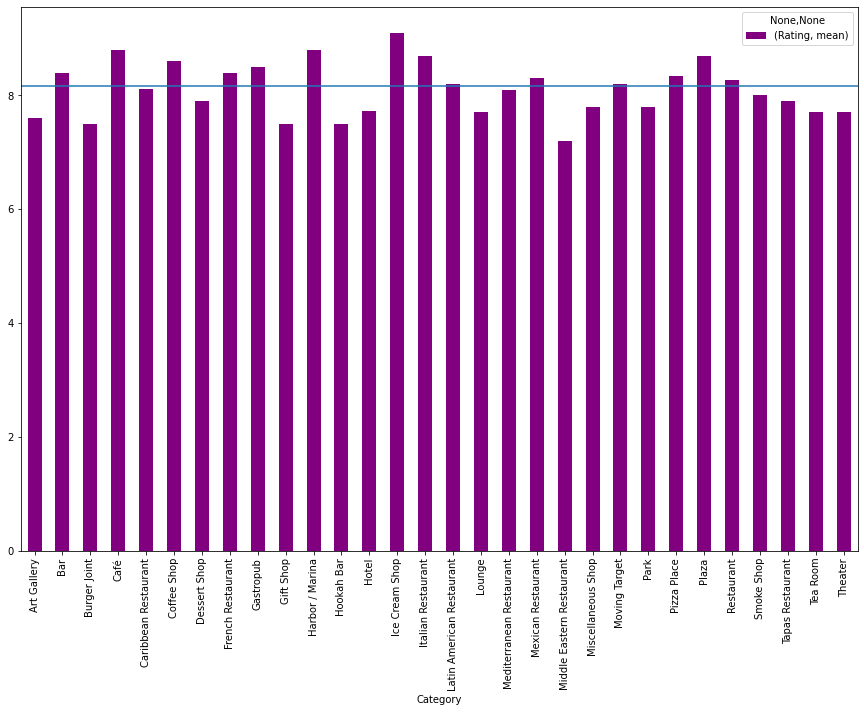

In [ ]:
df = df_merge_venues_with_rating[['Category', 'Borough', 'Neighborhood','Name','Rating']].sort_values(by='Rating', ascending=False) 

df = df[['Category','Rating']]
df = df.sort_values(by='Rating', ascending=False)

category_rating = df.groupby("Category").agg([np.mean])
plt = category_rating.plot(kind = "bar", figsize=(15, 10), color='purple')
plt.axhline(df.Rating.mean())


### Chart for the Top rating Venues

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


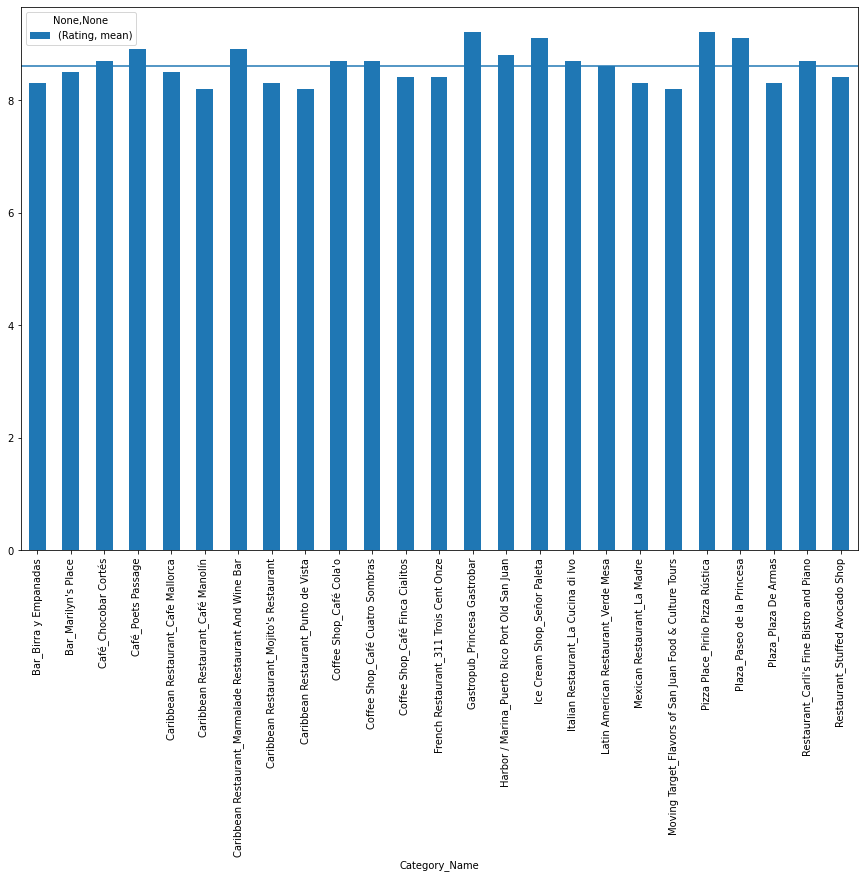

In [ ]:
df_above_mean = df_merge_venues_with_rating[df_merge_venues_with_rating.Rating > df_merge_venues_with_rating.Rating.mean()]
df_above_mean['Category_Name'] = df_above_mean.Category + "_" + df_above_mean.Name

df_above_mean_C = df_above_mean[['Category_Name', 'Rating']]
df_above_mean_C = df_above_mean_C.sort_values(by='Rating', ascending=False)

category_rating_C = df_above_mean_C.groupby("Category_Name").agg([np.mean])
plt = category_rating_C.plot(kind = "bar", figsize=(15, 10))
plt.axhline(df_above_mean_C.Rating.mean())

In [ ]:
df_venues_temp.describe()

,Neighborhood,Borough,ID,Name,Category,Latitude,Longitude,Address,City,Country,Distance,Neighborhood_Latitude,Neighborhood_Longitude,distkm
count,0,0,0,0,0,0,0,0,0,0,0,0,0,0
unique,0,0,0,0,0,0,0,0,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Venues information histogram by feature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85e0af6eb8>,
      dtype=object)

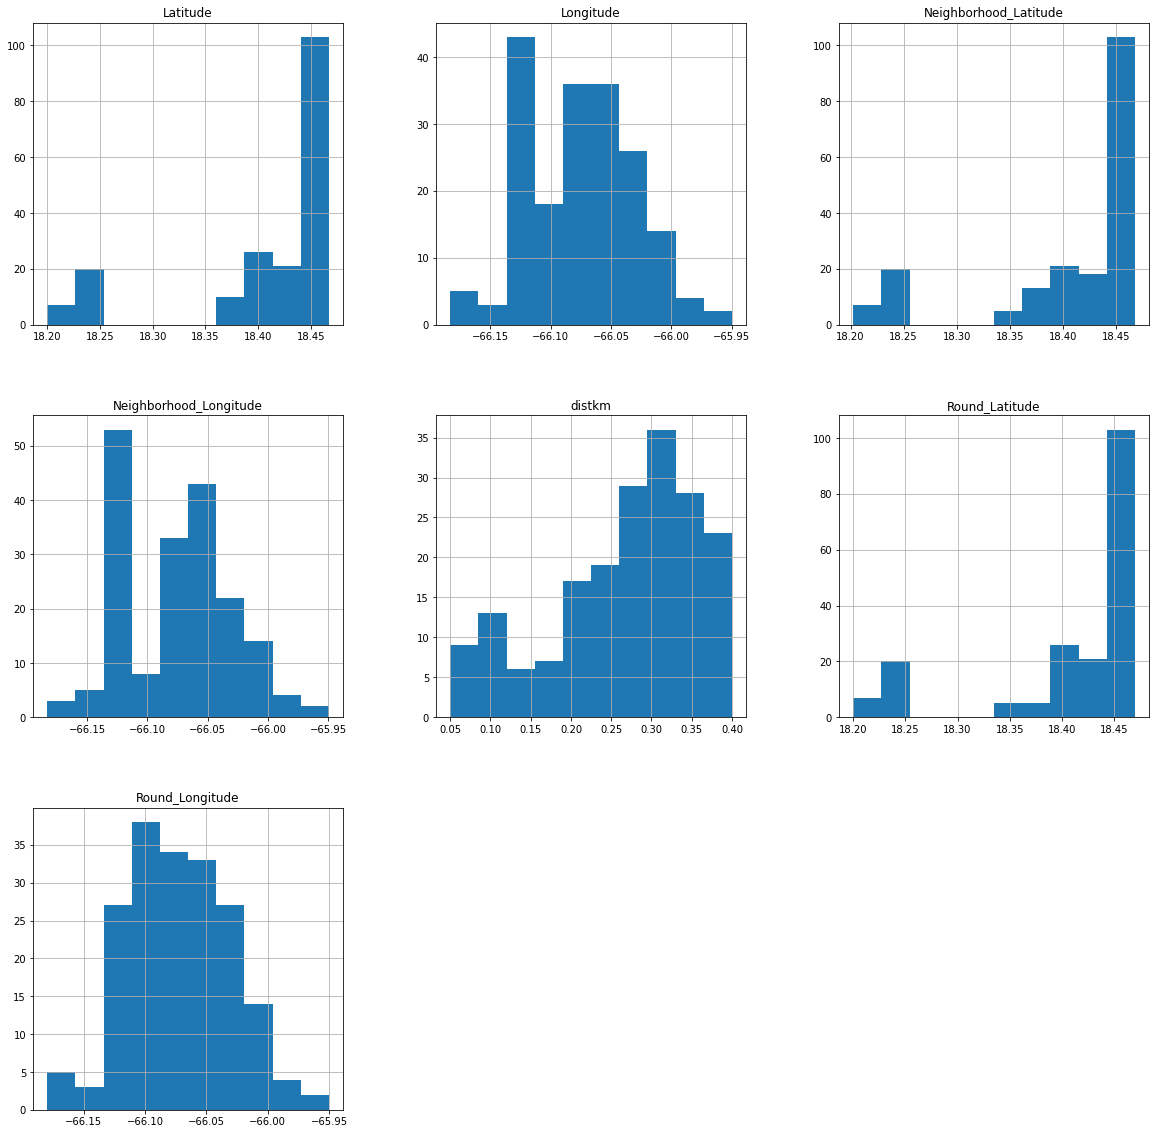

In [ ]:
df_venues_information.hist(figsize=(20, 20))

### Hotel venues information

In [ ]:
hotel_info = df_venues_information[df_venues_information.Category == 'Hotel']
print (hotel_info.shape)
hotel_info

(8, 16)


,Neighborhood,Borough,ID,Name,Category,Latitude,Longitude,Address,City,Country,Distance,Neighborhood_Latitude,Neighborhood_Longitude,distkm,Round_Latitude,Round_Longitude
35,Old San Juan,San Juan,4b943beff964a520447034e3,Casa Blanca Hotel,Hotel,18.465553,-66.113367,316 Cll Fortaleza,San Juan,Puerto Rico,302,18.4632,-66.1148,0.30,18.47,-66.11
43,Old San Juan,San Juan,4b480f32f964a520534726e3,Sheraton Old San Juan Hotel,Hotel,18.464149,-66.112134,100 Brumbaugh Street,San Juan,Puerto Rico,300,18.4632,-66.1148,0.30,18.46,-66.11
45,Old San Juan,San Juan,4bbaa4ca7421a5937d15c440,Hotel Da House,Hotel,18.466134,-66.113367,312 Calle San Francisco,Old San Juan,Puerto Rico,359,18.4632,-66.1148,0.36,18.47,-66.11
4,Ocean Park,San Juan,559a0798498e83b59cd4dab7,Dream Inn,Hotel,18.452204,-66.053808,2009 Calle McLeary,San Juan,Puerto Rico,340,18.4533,-66.0508,0.34,18.45,-66.05
18,Miramar,San Juan,525a8dd811d2b6e3a222031d,Ciqala Luxury Suites,Hotel,18.452450,-66.084265,752 Fernandez Juncos Ave.,San Juan,Puerto Rico,284,18.4549,-66.0835,0.28,18.45,-66.08
23,Miramar,San Juan,4bb7eb76b35776b05d67c801,Courtyard Marriott,Hotel,18.455613,-66.082180,801 Ponce De Leon Avenue,San Juan,Puerto Rico,160,18.4549,-66.0835,0.16,18.46,-66.08
24,Miramar,San Juan,4d67236b5b376dcb421f6867,Hotel Miramar,Hotel,18.456668,-66.085137,606 Ave Ponce de León,San Juan,Puerto Rico,261,18.4549,-66.0835,0.26,18.46,-66.09
8,Cangrejo Arriba,Carolina,5061b021e4b0ae4d63ced78c,San Juan Airport Hotel,Hotel,18.439058,-66.004972,Luis Muñoz Marín International Airport,San Juan,Puerto Rico,130,18.4402,-66.0047,0.13,18.44,-66.00


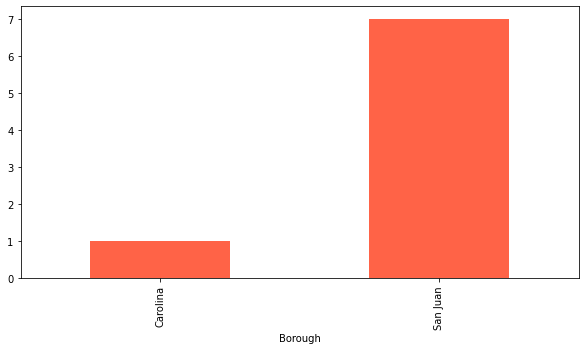

In [ ]:
clr = "tomato"
hotel_info.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)

### Chart by Venues category

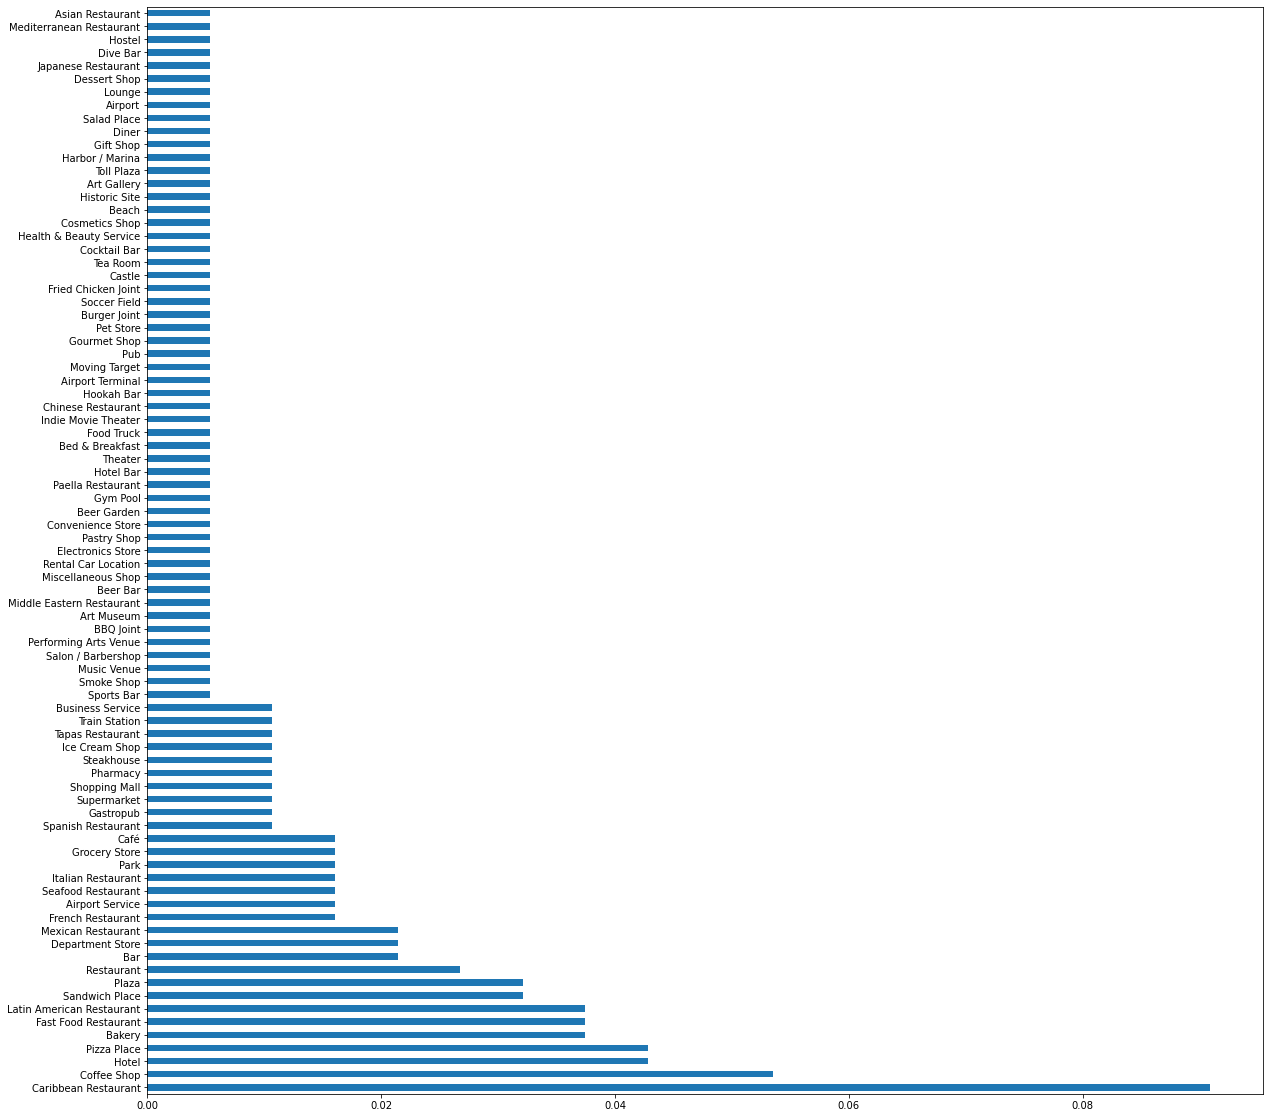

In [ ]:
# chart by proportitions
df_venues_information.Category.value_counts(normalize=True).plot.barh(figsize=(20, 20))

In [ ]:
df = df_venues_information
a  = df['Category'].value_counts()
b = pd.DataFrame(a)
b.reset_index(inplace=True)
b.columns = ['Category','quantity']

a1 = df_venues_information[['Borough','Category']].value_counts()
a1 = pd.DataFrame(a1)
a1.reset_index(inplace=True)
a1.columns = ['Borough', 'Category','quantity']
a1[['Borough','quantity']]
import numpy as np
a1 = a1[a1.quantity > a1.quantity.mean()]

df = a1
pivot_category = pd.pivot_table(df,index=["Category"],values=["quantity"],
               columns=["Borough"],aggfunc=[np.sum])

pivot_category

sum                         
                          quantity                         
Borough                    Bayamon Caguas Carolina San Juan
Category                                                   
Airport Service                NaN    NaN      3.0      NaN
Bakery                         NaN    2.0      NaN      4.0
Bar                            NaN    NaN      NaN      3.0
Café                           NaN    NaN      NaN      3.0
Caribbean Restaurant           NaN    NaN      NaN     14.0
Coffee Shop                    NaN    NaN      2.0      8.0
Department Store               NaN    3.0      NaN      NaN
Fast Food Restaurant           NaN    3.0      2.0      2.0
French Restaurant              NaN    NaN      NaN      3.0
Gastropub                      NaN    NaN      NaN      2.0
Hotel                          NaN    NaN      NaN      7.0
Ice Cream Shop                 NaN    NaN      NaN      2.0
Italian Restaurant             NaN    NaN      NaN      3.0
Latin American Restaurant      2.0    NaN      NaN      5.0
Mexican Restaurant             NaN    NaN      NaN      3.0
Park                           NaN    NaN      NaN      2.0
Pizza Place                    NaN    2.0      NaN      6.0
Plaza                          NaN    NaN      NaN      5.0
Restaurant                     NaN    NaN      NaN      5.0
Sandwich Place                 NaN    NaN      2.0      3.0
Seafood Restaurant             NaN    NaN      NaN      3.0
Spanish Restaurant             NaN    NaN      NaN      2.0
Supermarket                    NaN    NaN      NaN      2.0
Tapas Restaurant               NaN    NaN      NaN      2.0

In [ ]:
from matplotlib import *
import sys
from pylab import *

def combined_label(perc, tot):
    tot_str = "{1:.0f}%".format(perc * tot / 1000, perc * 100)
    return tot_str

def pareto_cum(data, focus):
    # Setup data frame
    parts = data[[focus, 'quantity']].groupby(focus).sum().sort_values(by='quantity', ascending=False) #groupby(focus).sum().sort('quantity', ascending=False)
    parts['percent'] = parts['quantity'] / parts.quantity.sum()
    parts['cum_percent'] = parts['percent'].cumsum()
    parts['cum_quantity'] = parts['quantity'].cumsum()
    return parts

def build_pareto(data, focus, limit_percent, city):
    # Filter and organize the data frame
    top_parts = data[data['cum_percent'] < limit_percent]
    top_parts.set_index(top_parts['percent'])
    
    # Draw the plots
    fig = plt.figure(figsize=(10,7))
    fig.subplots_adjust(bottom=0.4, left=0.15)
    ax = fig.add_subplot(1,1,1)
    top_parts['cum_percent'].plot(ax=ax, color="k", drawstyle="steps-post")
    top_parts['percent'].plot(ax=ax, kind="bar", color="k", alpha=0.5)
    ax.set_ylim(bottom=0, top=1)
    tick_nums = [x/float(100) for x in range(0,101,20)]
    ax.set_yticks(tick_nums)
    tot_cost = top_parts['quantity'].sum()
    ax.set_yticklabels([combined_label(x, tot_cost) for x in tick_nums])
    ax.set_title(city)
    ax.set_xlabel("")
    return ax

In [ ]:
df2 = df[df.quantity > df.quantity.mean()]
newrow=  df[df.quantity < df.quantity.mean()].quantity.sum()
newrow
df_newrow = pd.DataFrame({'Category':['Others'], 'quantity': [newrow]})
df_newrow
df2 = df2.append(df_newrow)
df2.reset_index(inplace=True)
df2

,index,Borough,Category,quantity
0,0,San Juan,Caribbean Restaurant,14
1,1,San Juan,Coffee Shop,8
2,2,San Juan,Hotel,7
3,3,San Juan,Pizza Place,6
4,4,San Juan,Latin American Restaurant,5
5,5,San Juan,Plaza,5
6,6,San Juan,Restaurant,5
7,7,San Juan,Bakery,4
8,0,NaN,Others,56


San Juan
Caguas
Carolina
Bayamon


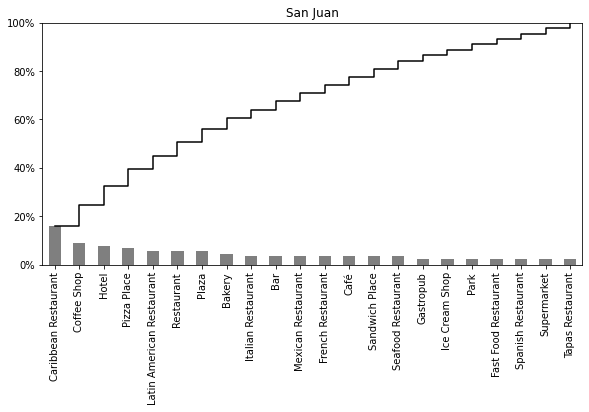

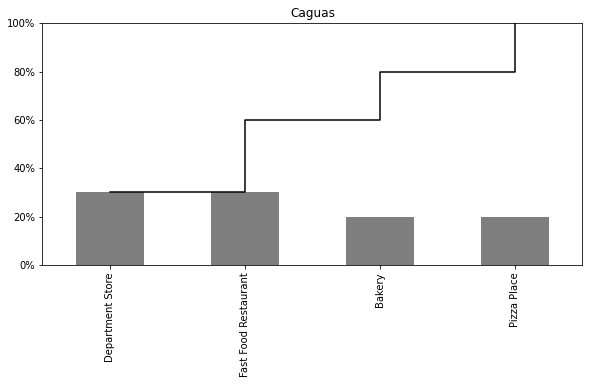

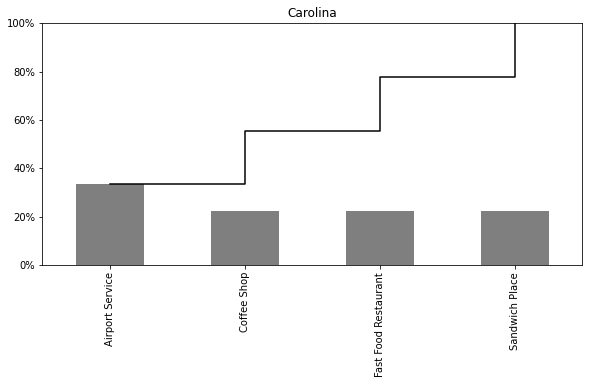

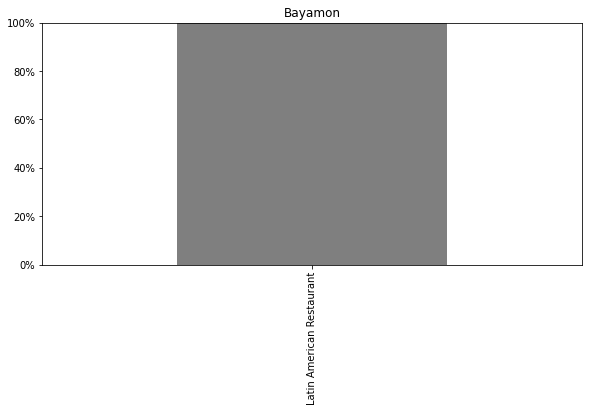

In [ ]:
a1 = df_venues_information[['Borough','Category']].value_counts()
a1 = pd.DataFrame(a1)
a1.reset_index(inplace=True)
a1.columns = ['Borough', 'Category','quantity']
a1[['Borough','quantity']]
import numpy as np
a1 = a1[a1.quantity > a1.quantity.mean()]
df=a1
 
borough_array = df.Borough.unique()

limit_percent = 100

for i in borough_array: 
    df_pareto = df[df.Borough == i]
    print(i) 
    city = i
    chart = build_pareto(pareto_cum(df_pareto, 'Category'), 'Category', limit_percent, city)
    


In [ ]:
print('df_venues_information size:',df_venues_information.shape)

b = df_venues_information[df_venues_information['Category'].str.contains('Rest')]

df_merge = pd.merge(df_metropr, df_venues_information, how='outer', on=['Round_Latitude', 'Round_Longitude'])
df_merge

df_venues_information size: (187, 16)


,Borough_x,Neighborhood_x,Latitude_x,Longitude_x,Round_Latitude,Round_Longitude,Neighborhood_y,Borough_y,ID,Name,Category,Latitude_y,Longitude_y,Address,City,Country,Distance,Neighborhood_Latitude,Neighborhood_Longitude,distkm
0,San Juan,Old San Juan,18.4632,-66.1148,18.46,-66.11,Old San Juan,San Juan,4cb2368a1463a1430eababa9,Café Cola'o,Coffee Shop,18.463513,-66.113035,Paseo Gilberto Concepción de Gracia (PR-1),Old San Juan,Puerto Rico,189,18.4632,-66.1148,0.19
1,San Juan,Old San Juan,18.4632,-66.1148,18.46,-66.11,Old San Juan,San Juan,4d56f930cf1b37049612c63f,Café Cuatro Sombras,Coffee Shop,18.464278,-66.114436,259 Recinto Sur,San Juan,Puerto Rico,126,18.4632,-66.1148,0.13
2,San Juan,Old San Juan,18.4632,-66.1148,18.46,-66.11,Old San Juan,San Juan,4c2a32758abca593814afe1f,Mojito's Restaurant,Caribbean Restaurant,18.464618,-66.113085,323 Recinto Sur,Old San Juan,Puerto Rico,240,18.4632,-66.1148,0.24
3,San Juan,Old San Juan,18.4632,-66.1148,18.46,-66.11,Old San Juan,San Juan,4c0a82987e3fc9281cb1f382,Puerto Rico Port Old San Juan,Harbor / Marina,18.463659,-66.112018,Cll Comercio,San Juan,Puerto Rico,298,18.4632,-66.1148,0.30
4,San Juan,Old San Juan,18.4632,-66.1148,18.46,-66.11,Old San Juan,San Juan,57890847498e908e5b831003,La Casita de Rones,Gastropub,18.463434,-66.114363,Plaza Darsenas,Old San Juan,Puerto Rico,53,18.4632,-66.1148,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,NaN,NaN,NaN,NaN,18.42,-65.98,Sabana Abajo,Carolina,4c60130223e303bb34d97407,Walgreens,Pharmacy,18.416229,-65.983463,Pr 190 & Campo Rico,Carolina,Puerto Rico,313,18.4148,-65.9809,0.31
213,NaN,NaN,NaN,NaN,18.42,-65.98,Sabana Abajo,Carolina,4dcb2099d22d7ffe9d277507,Ponderosa,Steakhouse,18.417223,-65.983115,Ave Campo Rico,Carolina,Puerto Rico,357,18.4148,-65.9809,0.36
214,NaN,NaN,NaN,NaN,18.42,-65.98,Sabana Abajo,Carolina,4e8f53b05c5c4562ef8b21e6,Subway,Sandwich Place,18.415388,-65.984007,"Rd 190 Km 5.1 Bo Sabana Abajo, Carolina",Carolina,Puerto Rico,334,18.4148,-65.9809,0.33
215,NaN,NaN,NaN,NaN,18.39,-66.15,Bayamón barrio-pueblo,Bayamon,4e79de5714954a343f91cbb2,Burlington,Department Store,18.394569,-66.146980,Sr 2 And Main Avenue,Bayamón,Puerto Rico,386,18.3958,-66.1504,0.39


In [ ]:
from folium import plugins
# create map using latitude and longitude values
import matplotlib.cm as cm
import matplotlib.colors as colors

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

address = 'Caguas, PR'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format("Borough Location Map")   
map_borough_location = folium.Map(location=[latitude, longitude], zoom_start=11)
map_borough_location.get_root().html.add_child(folium.Element(title_html))
# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(map_borough_location)
# add markers to map
for lat, lng, label in zip(df_metropr['Latitude'], df_metropr['Longitude'], df_metropr['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(incidents)  
    
map_borough_location

In [ ]:
# create map of San Juan place  using latitude and longitude values
map_venues = folium.Map(location=[latitude, longitude], zoom_start=12)
# add markers to map
for lat, lng, label, city in zip(df_venues_information.Latitude, df_venues_information.Longitude, df_venues_information.Name, df_venues_information.City):
   
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(map_venues)  
    
map_venues

In [ ]:
df_venues_information.head()

,Neighborhood,Borough,ID,Name,Category,Latitude,Longitude,Address,City,Country,Distance,Neighborhood_Latitude,Neighborhood_Longitude,distkm,Round_Latitude,Round_Longitude
0,Old San Juan,San Juan,54ba959b498ec165df98fb0e,Señor Paleta,Ice Cream Shop,18.464093,-66.116488,153 Calle Tetuan,San Juan,Puerto Rico,204,18.4632,-66.1148,0.20,18.46,-66.12
1,Old San Juan,San Juan,4cb2368a1463a1430eababa9,Café Cola'o,Coffee Shop,18.463513,-66.113035,Paseo Gilberto Concepción de Gracia (PR-1),Old San Juan,Puerto Rico,189,18.4632,-66.1148,0.19,18.46,-66.11
2,Old San Juan,San Juan,4d56f930cf1b37049612c63f,Café Cuatro Sombras,Coffee Shop,18.464278,-66.114436,259 Recinto Sur,San Juan,Puerto Rico,126,18.4632,-66.1148,0.13,18.46,-66.11
3,Old San Juan,San Juan,4ce71c309f776ea87ce55522,Carli's Fine Bistro and Piano,Restaurant,18.464079,-66.115151,Recinto Sur Street,San Juan,Puerto Rico,104,18.4632,-66.1148,0.10,18.46,-66.12
4,Old San Juan,San Juan,562bc873498e85c974281c88,Princesa Gastrobar,Gastropub,18.463721,-66.116876,Paseo la Princesa,Old San Juan,Puerto Rico,226,18.4632,-66.1148,0.23,18.46,-66.12


In [ ]:
# create map of Manhattan using latitude and longitude values
map_venues_by_location = folium.Map(location=[latitude, longitude], zoom_start=11)

title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format("Venus Name by Location Map")   
 
map_venues_by_location.get_root().html.add_child(folium.Element(title_html))

grouping = plugins.MarkerCluster().add_to(map_venues_by_location)

# add markers to map
for lat, lng, label in zip(df_venues_information['Neighborhood_Latitude'], df_venues_information['Neighborhood_Longitude'], df_venues_information['Category'] + ": " + df_venues_information['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(grouping)  
    
map_venues_by_location

In [ ]:
#----------------------------------------------
# OneHot Encoding of Features

# one hot encoding
venues_onehot = pd.get_dummies(df_venues_information[['Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_onehot['Neighborhood'] = df_venues_information['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

venues_onehot.shape

#--------------------------------------------

venues_grouped = venues_onehot.groupby('Neighborhood').mean().reset_index()
venues_grouped.head(7)

,Neighborhood,Airport,Airport Service,Airport Terminal,Art Gallery,Art Museum,Asian Restaurant,BBQ Joint,Bakery,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Burger Joint,Business Service,Café,Caribbean Restaurant,Castle,Chinese Restaurant,Cocktail Bar,Coffee Shop,Convenience Store,Cosmetics Shop,Department Store,Dessert Shop,Diner,Dive Bar,Electronics Store,Fast Food Restaurant,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Gift Shop,Gourmet Shop,Grocery Store,Gym Pool,Harbor / Marina,Health & Beauty Service,...,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Latin American Restaurant,Lounge,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Moving Target,Music Venue,Paella Restaurant,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plaza,Pub,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shopping Mall,Smoke Shop,Soccer Field,Spanish Restaurant,Sports Bar,Steakhouse,Supermarket,Tapas Restaurant,Tea Room,Theater,Toll Plaza,Train Station
0,Bayamón barrio-pueblo,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
1,Borirquen,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.200000,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.000,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.000000
2,Cangrejo Arriba,0.071429,0.214286,0.071429,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.142857,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.071429,0.071429,0.0,0.0,0.0,0.071429,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,Cañaboncito,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,Cañabón,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,Cerro Gordo,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6,Condado,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.000000,0.000000,0.0,0.0,0.0,0.125000,0.0,0.125,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000


In [ ]:
#Get top 10 venues per neighborhood¶

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] =  venues_grouped['Neighborhood']

for ind in np.arange(venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

neighborhoods_venues_sorted_transported = neighborhoods_venues_sorted.T
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Bayamón barrio-pueblo,Train Station,Department Store,Caribbean Restaurant,Food Truck,Cosmetics Shop,Dessert Shop,Diner,Dive Bar,Electronics Store,Fast Food Restaurant,French Restaurant,Coffee Shop,Fried Chicken Joint,Gastropub,Gift Shop,Gourmet Shop,Grocery Store,Gym Pool,Harbor / Marina,Health & Beauty Service
1,Borirquen,Fast Food Restaurant,Pizza Place,Department Store,Steakhouse,Fried Chicken Joint,Train Station,Convenience Store,Cosmetics Shop,Dessert Shop,Diner,Dive Bar,Electronics Store,Food Truck,Cocktail Bar,French Restaurant,Gastropub,Gift Shop,Gourmet Shop,Grocery Store,Gym Pool
2,Cangrejo Arriba,Airport Service,Coffee Shop,Fast Food Restaurant,Sandwich Place,Caribbean Restaurant,Pub,Rental Car Location,Airport,Hotel,Airport Terminal,Gift Shop,Cosmetics Shop,Department Store,Dessert Shop,Diner,Gym Pool,Dive Bar,Gastropub,Electronics Store,Grocery Store
3,Cañaboncito,Business Service,Train Station,Food Truck,Cosmetics Shop,Department Store,Dessert Shop,Diner,Dive Bar,Electronics Store,Fast Food Restaurant,French Restaurant,Coffee Shop,Fried Chicken Joint,Gastropub,Gift Shop,Gourmet Shop,Grocery Store,Gym Pool,Harbor / Marina,Health & Beauty Service
4,Cañabón,Plaza,Train Station,Food Truck,Cosmetics Shop,Department Store,Dessert Shop,Diner,Dive Bar,Electronics Store,Fast Food Restaurant,French Restaurant,Coffee Shop,Fried Chicken Joint,Gastropub,Gift Shop,Gourmet Shop,Grocery Store,Gym Pool,Harbor / Marina,Health & Beauty Service
5,Cerro Gordo,Grocery Store,Train Station,Food Truck,Cosmetics Shop,Department Store,Dessert Shop,Diner,Dive Bar,Electronics Store,Fast Food Restaurant,French Restaurant,Coffee Shop,Fried Chicken Joint,Gastropub,Gift Shop,Gourmet Shop,Gym Pool,Harbor / Marina,Health & Beauty Service,Convenience Store
6,Condado,Pizza Place,Train Station,Spanish Restaurant,Sandwich Place,Shopping Mall,Bakery,Caribbean Restaurant,BBQ Joint,Asian Restaurant,Cosmetics Shop,Department Store,Dessert Shop,Diner,Dive Bar,Electronics Store,Fast Food Restaurant,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub
7,Hato Rey,Food Truck,Chinese Restaurant,Grocery Store,Bakery,Train Station,Department Store,Dessert Shop,Diner,Dive Bar,Electronics Store,Fast Food Restaurant,Fried Chicken Joint,French Restaurant,Convenience Store,Gastropub,Gift Shop,Gourmet Shop,Gym Pool,Harbor / Marina,Health & Beauty Service
8,Hato Tejas,Latin American Restaurant,Train Station,French Restaurant,Cosmetics Shop,Department Store,Dessert Shop,Diner,Dive Bar,Electronics Store,Fast Food Restaurant,Food Truck,Fried Chicken Joint,Hookah Bar,Gastropub,Gift Shop,Gourmet Shop,Grocery Store,Gym Pool,Harbor / Marina,Health & Beauty Service
9,Minillas,BBQ Joint,Bakery,Train Station,French Restaurant,Department Store,Dessert Shop,Diner,Dive Bar,Electronics Store,Fast Food Restaurant,Food Truck,Gastropub,Fried Chicken Joint,Convenience Store,Gift Shop,Gourmet Shop,Grocery Store,Gym Pool,Harbor / Marina,Health & Beauty Service


## Determinate the assigned cluster by venue

In [ ]:
#Run k-means to cluster the neighborhoods into 5 clusters¶

# import k-means from clustering stage
from sklearn.cluster import KMeans

venues_data = df_venues_information

venues_data = venues_data.drop(1)
# set number of clusters
kclusters = 5

venues_grouped_clustering = venues_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 3, 1, 4, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4,
       1, 1], dtype=int32)

In [ ]:
venues_merged = venues_data

# add clustering labels
neighborhoods_venues_sorted['ClusterLabels'] = kmeans.labels_
venues_merged = venues_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

venues_merged.head()

,Neighborhood,Borough,ID,Name,Category,Latitude,Longitude,Address,City,Country,Distance,Neighborhood_Latitude,Neighborhood_Longitude,distkm,Round_Latitude,Round_Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,ClusterLabels
0,Old San Juan,San Juan,54ba959b498ec165df98fb0e,Señor Paleta,Ice Cream Shop,18.464093,-66.116488,153 Calle Tetuan,San Juan,Puerto Rico,204,18.4632,-66.1148,0.20,18.46,-66.12,Caribbean Restaurant,Coffee Shop,Plaza,Restaurant,Hotel,Pizza Place,Bar,Café,Latin American Restaurant,Gastropub,Ice Cream Shop,Italian Restaurant,Hookah Bar,Lounge,Mediterranean Restaurant,Harbor / Marina,Mexican Restaurant,Dessert Shop,Middle Eastern Restaurant,Miscellaneous Shop,1
2,Old San Juan,San Juan,4d56f930cf1b37049612c63f,Café Cuatro Sombras,Coffee Shop,18.464278,-66.114436,259 Recinto Sur,San Juan,Puerto Rico,126,18.4632,-66.1148,0.13,18.46,-66.11,Caribbean Restaurant,Coffee Shop,Plaza,Restaurant,Hotel,Pizza Place,Bar,Café,Latin American Restaurant,Gastropub,Ice Cream Shop,Italian Restaurant,Hookah Bar,Lounge,Mediterranean Restaurant,Harbor / Marina,Mexican Restaurant,Dessert Shop,Middle Eastern Restaurant,Miscellaneous Shop,1
3,Old San Juan,San Juan,4ce71c309f776ea87ce55522,Carli's Fine Bistro and Piano,Restaurant,18.464079,-66.115151,Recinto Sur Street,San Juan,Puerto Rico,104,18.4632,-66.1148,0.10,18.46,-66.12,Caribbean Restaurant,Coffee Shop,Plaza,Restaurant,Hotel,Pizza Place,Bar,Café,Latin American Restaurant,Gastropub,Ice Cream Shop,Italian Restaurant,Hookah Bar,Lounge,Mediterranean Restaurant,Harbor / Marina,Mexican Restaurant,Dessert Shop,Middle Eastern Restaurant,Miscellaneous Shop,1
4,Old San Juan,San Juan,562bc873498e85c974281c88,Princesa Gastrobar,Gastropub,18.463721,-66.116876,Paseo la Princesa,Old San Juan,Puerto Rico,226,18.4632,-66.1148,0.23,18.46,-66.12,Caribbean Restaurant,Coffee Shop,Plaza,Restaurant,Hotel,Pizza Place,Bar,Café,Latin American Restaurant,Gastropub,Ice Cream Shop,Italian Restaurant,Hookah Bar,Lounge,Mediterranean Restaurant,Harbor / Marina,Mexican Restaurant,Dessert Shop,Middle Eastern Restaurant,Miscellaneous Shop,1
5,Old San Juan,San Juan,4d24944e14f2b1f740956fbe,Paseo de la Princesa,Plaza,18.463550,-66.117026,Paseo de la Princesa,San Juan,Puerto Rico,238,18.4632,-66.1148,0.24,18.46,-66.12,Caribbean Restaurant,Coffee Shop,Plaza,Restaurant,Hotel,Pizza Place,Bar,Café,Latin American Restaurant,Gastropub,Ice Cream Shop,Italian Restaurant,Hookah Bar,Lounge,Mediterranean Restaurant,Harbor / Marina,Mexican Restaurant,Dessert Shop,Middle Eastern Restaurant,Miscellaneous Shop,1


### Distribution chart 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85cf926898>]],
      dtype=object)

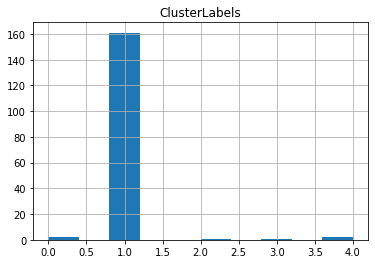

In [ ]:
venues_merged[['ClusterLabels']].hist()

In [ ]:
#Table view
venues_merged_group = venues_merged.groupby(['ClusterLabels']).size()
venues_merged_group = venues_merged_group.sort_values(ascending=False)
print (venues_merged_group)
print ()

ClusterLabels
1    161
4      2
0      2
3      1
2      1
dtype: int64



In [ ]:
#Get the top 100 venues in the neighborhood '
neighborhood_latitude = venues_data.loc[0, 'Latitude'] # neighbourhood latitude value
neighborhood_longitude = venues_data.loc[0, 'Longitude'] # neighbourhood longitude value

neighborhood_name = venues_data.loc[0, 'Neighborhood'] # neighbourhood name

In [ ]:
#Visualize the clusters in the map by Color

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

address = 'Caguas, PR'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map
map_clusters = folium.Map(location = [latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(venues_merged['Latitude'], venues_merged['Longitude'], venues_merged['Category'], venues_merged['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### View each of the 5 clusters

In [ ]:
#Cluster 0
c0=venues_merged.loc[venues_merged['ClusterLabels'] == 0, venues_merged.columns[[1] + list(range(5, venues_merged.shape[1]))]]
print(c0)
print()
#Cluster 1 
c1=venues_merged.loc[venues_merged['ClusterLabels'] == 1, venues_merged.columns[[1] + list(range(5, venues_merged.shape[1]))]]
print(c1)
print()
#Cluster 2
c2=venues_merged.loc[venues_merged['ClusterLabels'] == 2, venues_merged.columns[[1] + list(range(5, venues_merged.shape[1]))]]
print(c2)
print()
#Cluster 3
c3=venues_merged.loc[venues_merged['ClusterLabels'] == 3, venues_merged.columns[[1] + list(range(5, venues_merged.shape[1]))]]
print(c3)
print()
#Cluster 4
c4 =venues_merged.loc[venues_merged['ClusterLabels'] == 4, venues_merged.columns[[1] + list(range(5, venues_merged.shape[1]))]]
print(c4)
print()

    Borough   Latitude  ...   20th Most Common Venue ClusterLabels
0  San Juan  18.363358  ...  Health & Beauty Service             0
0   Bayamon  18.362540  ...  Health & Beauty Service             0

[2 rows x 33 columns]

     Borough   Latitude  ...   20th Most Common Venue ClusterLabels
0   San Juan  18.464093  ...       Miscellaneous Shop             1
2   San Juan  18.464278  ...       Miscellaneous Shop             1
3   San Juan  18.464079  ...       Miscellaneous Shop             1
4   San Juan  18.463721  ...       Miscellaneous Shop             1
5   San Juan  18.463550  ...       Miscellaneous Shop             1
..       ...        ...  ...                      ...           ...
0   Carolina  18.416229  ...                 Gym Pool             1
2   Carolina  18.415388  ...                 Gym Pool             1
0    Bayamon  18.406858  ...  Health & Beauty Service             1
0    Bayamon  18.395464  ...  Health & Beauty Service             1
2    Bayamon  18.394118  ..

In [ ]:
venues_grp = df_venues_information.groupby(['Borough','Neighborhood']).count()
print('There are {} uniques categories.'.format(len(df_venues_information['Category'].unique())))

There are 83 uniques categories.


In [ ]:
venues_grp

ID  Name  ...  Round_Latitude  Round_Longitude
Borough  Neighborhood                     ...                                 
Bayamon  Bayamón barrio-pueblo   3     3  ...               3                3
         Cerro Gordo             1     1  ...               1                1
         Hato Tejas              2     2  ...               2                2
         Minillas                2     2  ...               2                2
Caguas   Borirquen               5     5  ...               5                5
         Cañaboncito             1     1  ...               1                1
         Cañabón                 1     1  ...               1                1
         Pueblo                 14    14  ...              14               14
         Turabo                  6     6  ...               6                6
Carolina Cangrejo Arriba        14    14  ...              14               14
         Sabana Abajo            3     3  ...               3                3
         San Antón               1     1  ...               1                1
         Trujillo Bajo           2     2  ...               2                2
San Juan Condado                 8     8  ...               8                8
         Hato Rey                4     4  ...               4                4
         Miramar                26    26  ...              26               26
         Monacillo               2     2  ...               2                2
         Monacillo Urbano        3     3  ...               3                3
         Ocean Park              7     7  ...               7                7
         Old San Juan           53    53  ...              53               53
         Sabana Llana Sur        8     8  ...               8                8
         San Juan Antiguo        8     8  ...               8                8
         Santurce                9     9  ...               9                9
         Universidad             4     4  ...               4                4

[24 rows x 14 columns]

### Obtain available Jobs for IT

In [ ]:
# get job info
job_title = "IT"

state = "Puerto Rico"

df_jobs_all = pd.DataFrame()

for city in np.unique(df_venues_information.Borough):
    print (city)
    monster_url = 'https://www.monster.com/jobs/search/?q={}&where={}__2C-{}&intcid=skr_navigation_nhpso_searchMain'
    
    start_url = monster_url.format(job_title, city, state)
    page_url = start_url + '&stpage=1&page={}'
    
    listado_jobs = []
    
    import requests
    from bs4 import BeautifulSoup
    #base_url = 'https://au.pcpartpicker.com/product/jLF48d'
    r = requests.get(page_url)
    soup = BeautifulSoup(r.text)
    
    
    for hit in soup.find_all("div",class_='summary'):
        
        for a in hit.find_all("header",class_='card-header'): 
            jobs = a.find('h2').text
            jobs = jobs.replace("\r\n","")
            listado_jobs.append(jobs)
            
            
    df_jobs = pd.DataFrame({'jobs' : listado_jobs})
    df_jobs['Borough'] = city
    df_jobs_all = df_jobs_all.append(df_jobs)
    
#---------------------------------------
df_jobs_all.drop_duplicates(keep='first',inplace=True) 

df_jobs_all_grp = df_jobs_all.groupby(['Borough']).count()

Bayamon
Caguas
Carolina
San Juan


In [ ]:
df_jobs_all

,jobs,Borough
0,Application Engineer,Bayamon
1,IT Project Manager and IT Business Systems Ana...,Bayamon
2,IT Specialist -,Bayamon
3,IT Business Analyst -,Bayamon
4,Network Administrator -,Bayamon
...,...,...
19,HUMAN RESOURCES GENERALIST,San Juan
20,Production Operator,San Juan
21,Financial Analyst - SR,San Juan
22,"IT Security Analyst - San Juan, PR",San Juan


### Obtain the appartment information

In [ ]:
import numpy as np
from bs4 import BeautifulSoup
import re
from geopy.geocoders import Nominatim # module to convert an address into Latitude and longitude values
import requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium 

cities = ['San Juan','Bayamon','Caguas', 'Carolina']

df_info_appartments_All = pd.DataFrame()

for city in cities:

    lista = []    
    changed_city = city.replace(' ','-')
    print (changed_city)

    url = 'https://www.realtor.com/apartments/{}_PR'.format(changed_city)
    
    #print (url)    
    content = requests.get(url).content  
    
    soup = BeautifulSoup(content, 'html.parser') 
    #get list of all li 
    
    list_all_li = soup.findAll('li', attrs={"data-testid": "ResultCardTest"}) # soup.findAll('li')
      
    row_list = []
    
    df_info_appartments = pd.DataFrame()   
    
    for text in list_all_li:     
        meta_address = text.find("div", attrs={'data-label': 'pc-address'})         
        #print (meta_price)        
        meta_price = text.find('span', attrs={'data-label': 'pc-price'})        
        meta_baths = text.find('li', attrs={'data-label': 'pc-meta-baths'})
        #print (meta_baths)        
        meta_beds = text.find('li', attrs={'data-label': 'pc-meta-beds'})        
        #print (meta_beds)        
        meta_sqft = text.find('li', attrs={'data-label': 'pc-meta-sqft'})
        #print (meta_sqft)        
        meta_lotsize = text.find('li', attrs={'data-label': 'pc-meta-lotsize'})
        meta_garage = text.find('li', attrs={'data-label': 'pc-meta-garage'})        
        #print (meta_price)        
        address = meta_address.text
            
        #print (address)        
        postal_code = re.search(r'.*(\d{5}(\-\d{4})?)$', address)
        
        try:
            zipcode = postal_code.groups()[0] #address[-6:]     
        except:
            print ("error")
            
        price = meta_price.text.split('/')[0]
        
        beds = meta_beds.text
        baths = meta_baths.text
        
        if meta_sqft is not None:
            sqft = meta_sqft.text
        else:
            sqft = 0
        
        if meta_lotsize is not None:
            lotsize = meta_lotsize.text
        else:
            lotsize = 0
        
        if meta_garage is not None:
            garage = meta_garage.text
        else:
            garage = 0
            
        #print (zipcode)
        row = pd.Series([address, zipcode, price, beds, baths, sqft, lotsize, garage])
        #print (len(row))        
        row_list.append(row)

        df_info_appartments = pd.DataFrame(row_list)
        df_info_appartments_All = df_info_appartments_All.append(df_info_appartments)

columns=['address', 'zipcode', 'price','beds','baths','sqft','lotsize','garage']
           
df_info_appartments_All.columns = columns

#df_info_appartments_All.drop_duplicates(keep='first',inplace=True) 

df_info_appartments_All.drop_duplicates(keep='first', inplace=True)

df_info_appartments_All['beds'] = df_info_appartments_All['beds'].str.replace('bed', '')
df_info_appartments_All['baths'] = df_info_appartments_All['baths'].str.replace('bath', '')
df_info_appartments_All['baths'] = df_info_appartments_All['baths'].str.replace('+', '')
df_info_appartments_All['price'] = df_info_appartments_All['price'].str.replace('$', '')
df_info_appartments_All['price'] = df_info_appartments_All['price'].str.replace(',', '')
df_info_appartments_All['sqft'] = df_info_appartments_All['sqft'].str.replace('sqft', '')
df_info_appartments_All['sqft'] = df_info_appartments_All['sqft'].str.replace(',', '')
df_info_appartments_All["sqft"] = df_info_appartments_All["sqft"].astype(str).astype(float)
df_info_appartments_All["beds"] = df_info_appartments_All["beds"].astype(str).astype(float)
df_info_appartments_All["baths"] = df_info_appartments_All["baths"].astype(str).astype(float)
df_info_appartments_All["price"] = df_info_appartments_All["price"].astype(str).astype(float)
df_info_appartments_All['price_per_sqft'] = df_info_appartments_All.price / df_info_appartments_All.sqft
df_info_appartments_All['Category'] = df_info_appartments_All['address'].str.split('-').str[0]
df_appt_3beds = df_info_appartments_All[df_info_appartments_All.beds >= 3]    
df_appt_3beds_price = df_appt_3beds[df_appt_3beds.price < 3000]


San-Juan
Bayamon
Caguas
Carolina
error


In [ ]:
# Build the appartment information dataframe including address based on zipcodes
df_info_appartments_with_address = pd.merge(df_info_appartments_All, datos_zipcode, how='inner', on=['zipcode'])
print(df_info_appartments_All.shape)
print(df_info_appartments_with_address.shape)

(16, 10)
(14, 13)


In [ ]:
df_info_appartments_with_address

,address,zipcode,price,beds,baths,sqft,lotsize,garage,price_per_sqft,Category,Borough,Latitude,Longitude
0,"1351 Ave Magdalena Apt 8B, San Juan, PR 00907",00907,5000.0,4.0,3.0,1900.0,0,0,2.631579,"1351 Ave Magdalena Apt 8B, San Juan, PR 00907",San Juan,18.451852,-66.084976
1,"25 Ave Munoz Rivera Unit 6, San Juan, PR 00901",00901,7500.0,3.0,2.5,1894.0,0,0,3.959873,"25 Ave Munoz Rivera Unit 6, San Juan, PR 00901",San Juan,18.465400,-66.104373
2,"417 Calle Del Sol Unit 2B, San Juan, PR 00901",00901,2500.0,2.0,2.0,1200.0,0,0,2.083333,"417 Calle Del Sol Unit 2B, San Juan, PR 00901",San Juan,18.465400,-66.104373
3,"258 Calle De San Justo Ste 3, San Juan, PR 00901",00901,1500.0,1.0,1.0,930.0,0,0,1.612903,"258 Calle De San Justo Ste 3, San Juan, PR 00901",San Juan,18.465400,-66.104373
4,"210 Calle Sol Unit 1, San Juan, PR 00901",00901,1900.0,2.0,0.5,1100.0,0,0,1.727273,"210 Calle Sol Unit 1, San Juan, PR 00901",San Juan,18.465400,-66.104373
5,"59 Calle San Miguel, San Juan, PR 00959",00959,1800.0,1.0,1.0,512.0,0,0,3.515625,"59 Calle San Miguel, San Juan, PR 00959",Bayamon,18.392506,-66.158212
6,"271 Calle 6 Unit 271, San Juan, PR 00961",00961,3500.0,2.0,1.0,1293.0,0,0,2.706883,"271 Calle 6 Unit 271, San Juan, PR 00961",Bayamon,18.413087,-66.161162
7,"Bayamon Urb Forest Hl, Bayamón, PR 00925",00925,800.0,4.0,2.0,NaN,0,0,NaN,"Bayamon Urb Forest Hl, Bayamón, PR 00925",San Juan,18.403282,-66.047812
8,C-303 Condominio Puertas Del Parque San Jose U...,00725,1500.0,3.0,2.0,1816.0,0,0,0.825991,C,Caguas,18.205646,-66.034458
9,"400 Grand Blvd Los Prados Apt 9202, Caguas, PR...",00727,1250.0,3.0,2.0,1492.0,0,0,0.837802,"400 Grand Blvd Los Prados Apt 9202, Caguas, PR...",Caguas,18.216710,-66.055275


### Box plot of those appartments with 3 and 4 beds

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


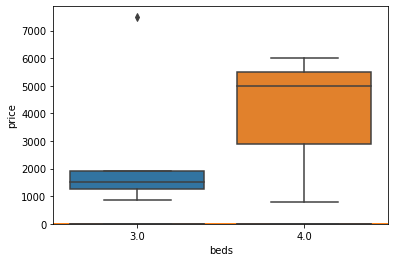

In [ ]:
import seaborn as sns

df_info_appartments_with_address_grp = df_info_appartments_with_address.groupby(['Borough']).count()
df_info_appartments_with_address_grp['Borough'] = df_info_appartments_with_address_grp.index

df_info_appartments_with_address_grp['Latitude'].plot.hist(alpha=0.4)
sns.distplot(df_info_appartments_with_address_grp['Latitude'],bins=15)
sns.boxplot(x='beds', y= 'price', data=df_info_appartments_with_address_grp)
sns.boxplot(x='Borough', y= 'price', data=df_info_appartments_with_address_grp)
sns.boxplot(x='beds', y= 'price', data=df_appt_3beds)

In [ ]:
# one hot encoding
appt_onehot = pd.get_dummies(df_info_appartments_with_address[['Category']], prefix="", prefix_sep="")

# add neighborhood column back to 
appt_onehot['Category'] = df_info_appartments_with_address['Category'] 
# move neighborhood column to the first column
fixed_columns = [appt_onehot.columns[-1]] + list(appt_onehot.columns[:-1])
appt_onehot = appt_onehot[fixed_columns]
appt_onehot.head()
#--------------------------------------------

appt_grouped = appt_onehot.groupby('Category').mean().reset_index()
appt_grouped.head(7)
#####################

#Get top 10 venues per neighborhood¶

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 3
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Category']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_appt_sorted = pd.DataFrame(columns=columns)
neighborhoods_appt_sorted['Category'] = appt_grouped['Category']

for ind in np.arange(appt_grouped.shape[0]):
    neighborhoods_appt_sorted.iloc[ind, 1:] = return_most_common_venues(appt_grouped.iloc[ind, :], num_top_venues)

neighborhoods_appt_sorted.head()

#neighborhoods_venues_sorted_transported = .T
#####################

# import k-means from clustering stage
from sklearn.cluster import KMeans

appt_data = df_info_appartments_with_address
appt_data = appt_data.drop(1)
kclusters = 5
appt_grouped_clustering = appt_grouped.drop('Category', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(appt_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

####################################

appt_merged = appt_data
# add clustering labels
neighborhoods_appt_sorted['ClusterLabels'] = kmeans.labels_

appt_merged = appt_merged.join(neighborhoods_appt_sorted.set_index('Category'), on='Category')
appt_merged.head()

,address,zipcode,price,beds,baths,sqft,lotsize,garage,price_per_sqft,Category,Borough,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,ClusterLabels
0,"1351 Ave Magdalena Apt 8B, San Juan, PR 00907",00907,5000.0,4.0,3.0,1900.0,0,0,2.631579,"1351 Ave Magdalena Apt 8B, San Juan, PR 00907",San Juan,18.451852,-66.084976,"1351 Ave Magdalena Apt 8B, San Juan, PR 00907",C,"Bayamon Urb Forest Hl, Bayamón, PR 00925",0
2,"417 Calle Del Sol Unit 2B, San Juan, PR 00901",00901,2500.0,2.0,2.0,1200.0,0,0,2.083333,"417 Calle Del Sol Unit 2B, San Juan, PR 00901",San Juan,18.465400,-66.104373,"417 Calle Del Sol Unit 2B, San Juan, PR 00901",C,"Bayamon Urb Forest Hl, Bayamón, PR 00925",0
3,"258 Calle De San Justo Ste 3, San Juan, PR 00901",00901,1500.0,1.0,1.0,930.0,0,0,1.612903,"258 Calle De San Justo Ste 3, San Juan, PR 00901",San Juan,18.465400,-66.104373,"258 Calle De San Justo Ste 3, San Juan, PR 00901",C,"Bayamon Urb Forest Hl, Bayamón, PR 00925",0
4,"210 Calle Sol Unit 1, San Juan, PR 00901",00901,1900.0,2.0,0.5,1100.0,0,0,1.727273,"210 Calle Sol Unit 1, San Juan, PR 00901",San Juan,18.465400,-66.104373,"210 Calle Sol Unit 1, San Juan, PR 00901",C,"Bayamon Urb Forest Hl, Bayamón, PR 00925",0
5,"59 Calle San Miguel, San Juan, PR 00959",00959,1800.0,1.0,1.0,512.0,0,0,3.515625,"59 Calle San Miguel, San Juan, PR 00959",Bayamon,18.392506,-66.158212,"59 Calle San Miguel, San Juan, PR 00959",C,"Bayamon Urb Forest Hl, Bayamón, PR 00925",2


### Table with the assigned cluster label by Borough

In [ ]:
appt_merged[['Borough', 'ClusterLabels']].value_counts()

Borough   ClusterLabels
San Juan  0                5
Caguas    0                2
Carolina  4                1
          3                1
          1                1
          0                1
Bayamon   2                1
          0                1
dtype: int64

In [ ]:

c0=appt_merged.loc[appt_merged['ClusterLabels'] == 0, appt_merged.columns[[1] + list(range(5, appt_merged.shape[1]))]]

b0 = appt_merged[appt_merged['ClusterLabels'] == 0]
print (b0)
print()

b1 = appt_merged[appt_merged['ClusterLabels'] == 1]
print (b1)
print()

b2 = appt_merged[appt_merged['ClusterLabels'] == 2]
print (b2)
print()

#-----------------------------------------------------------

km = KMeans(n_clusters=5)
y_predicted= km.fit_predict(df_info_appartments_with_address[['beds','price']])
df_info_appartments_with_address['predicted_cluster'] = y_predicted


                                              address  ... ClusterLabels
0       1351 Ave Magdalena Apt 8B, San Juan, PR 00907  ...             0
2       417 Calle Del Sol Unit 2B, San Juan, PR 00901  ...             0
3    258 Calle De San Justo Ste 3, San Juan, PR 00901  ...             0
4            210 Calle Sol Unit 1, San Juan, PR 00901  ...             0
6            271 Calle 6 Unit 271, San Juan, PR 00961  ...             0
7            Bayamon Urb Forest Hl, Bayamón, PR 00925  ...             0
8   C-303 Condominio Puertas Del Parque San Jose U...  ...             0
9   400 Grand Blvd Los Prados Apt 9202, Caguas, PR...  ...             0
13   5869 Ave Isla Verde Apt 2020, Carolina, PR 00979  ...             0

[9 rows x 17 columns]

                                             address  ... ClusterLabels
12  3103 Ave Isla Verde Apt 1003, Carolina, PR 00979  ...             1

[1 rows x 17 columns]

                                   address  ... ClusterLabels
5  59 Calle San 

In [ ]:
df_info_appartments_with_address.head()

,address,zipcode,price,beds,baths,sqft,lotsize,garage,price_per_sqft,Category,Borough,Latitude,Longitude,predicted_cluster
0,"1351 Ave Magdalena Apt 8B, San Juan, PR 00907",00907,5000.0,4.0,3.0,1900.0,0,0,2.631579,"1351 Ave Magdalena Apt 8B, San Juan, PR 00907",San Juan,18.451852,-66.084976,3
1,"25 Ave Munoz Rivera Unit 6, San Juan, PR 00901",00901,7500.0,3.0,2.5,1894.0,0,0,3.959873,"25 Ave Munoz Rivera Unit 6, San Juan, PR 00901",San Juan,18.465400,-66.104373,1
2,"417 Calle Del Sol Unit 2B, San Juan, PR 00901",00901,2500.0,2.0,2.0,1200.0,0,0,2.083333,"417 Calle Del Sol Unit 2B, San Juan, PR 00901",San Juan,18.465400,-66.104373,2
3,"258 Calle De San Justo Ste 3, San Juan, PR 00901",00901,1500.0,1.0,1.0,930.0,0,0,1.612903,"258 Calle De San Justo Ste 3, San Juan, PR 00901",San Juan,18.465400,-66.104373,0
4,"210 Calle Sol Unit 1, San Juan, PR 00901",00901,1900.0,2.0,0.5,1100.0,0,0,1.727273,"210 Calle Sol Unit 1, San Juan, PR 00901",San Juan,18.465400,-66.104373,0


In [ ]:
df_info_appartments_with_address[['Borough', 'predicted_cluster']].value_counts()

Borough   predicted_cluster
San Juan  0                    2
Carolina  2                    2
San Juan  4                    1
          3                    1
          2                    1
          1                    1
Carolina  4                    1
          0                    1
Caguas    4                    1
          0                    1
Bayamon   2                    1
          0                    1
dtype: int64

### Visualization of the distribution of teh Cluster assignation by Borough

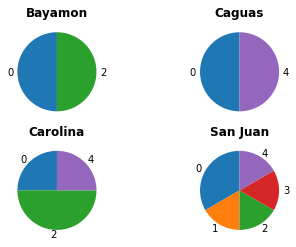

In [ ]:
# Pie chart
fig, ax = plt.subplots(2,2)
ax = ax.flatten()
tab = pd.crosstab(df_info_appartments_with_address['Borough'],df_info_appartments_with_address['predicted_cluster'])
for i,cat in enumerate(tab.index):
    tab.loc[cat].plot.pie(ax=ax[i],startangle=90)
    ax[i].set_ylabel('')
    ax[i].set_title(cat, fontweight='bold')

### Boxplot by numeric features

visualization by Borough vs price

In [ ]:
df_info_appartments_with_address_grp

,address,zipcode,price,beds,baths,sqft,lotsize,garage,price_per_sqft,Category,Latitude,Longitude,Borough
Borough,,,,,,,,,,,,,
Bayamon,2,2,2,2,2,2,2,2,2,2,2,2,Bayamon
Caguas,2,2,2,2,2,2,2,2,2,2,2,2,Caguas
Carolina,4,4,4,4,4,4,4,4,4,4,4,4,Carolina
San Juan,6,6,6,6,6,5,6,6,5,6,6,6,San Juan


### Scatter Plot beds by price

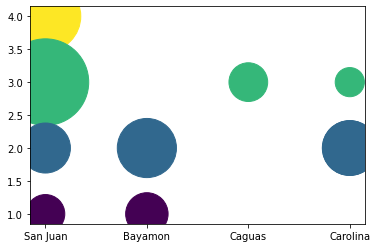

In [ ]:
plt.scatter(df_info_appartments_with_address.Borough, df_info_appartments_with_address.beds, s=df_info_appartments_with_address.price, c=df_info_appartments_with_address.beds)

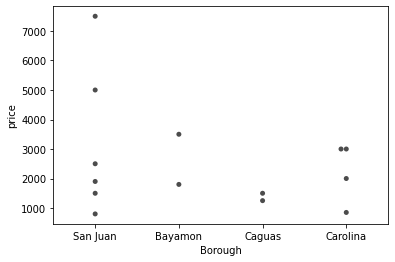

In [ ]:
sns.swarmplot(x='Borough', 
              y='price', 
              data=df_info_appartments_with_address, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent

### Visualize the appartments dataframe features correlation

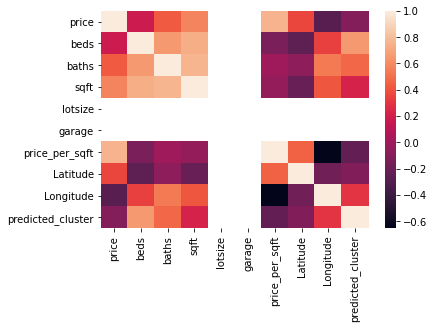

In [ ]:
corr = df_info_appartments_with_address.corr() 
# Heatmap
sns.heatmap(corr)

## Obtain Gym information

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium 


lista = []
lista_address = []
df = pd.DataFrame()
data = {}

city = 'Caguas'
startnumber = 1

cities = ['Bayamon', 'Caguas', 'Carolina', 'San Juan']
state = "Puerto Rico"

df_gyms_all = pd.DataFrame()
    
for city in cities:
    url = 'https://www.yelp.com/search?cflt=gyms&find_loc={}%2C%20Puerto%20Rico&sortby=recommended'.format(city)
    
    address = '{}, Puerto Rico'.format(city)

    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print(latitude, longitude)
    
    # get contents from url
    content = requests.get(url).content
    # get soup
    soup = BeautifulSoup(content,'lxml') # choose lxml parser
    # find the tag : <img ... >
    image_tags = soup.findAll(['img','span'])
    # print out image urls
    for image_tag in image_tags:
        
        spans = soup.find('span', {'class':'lemon--span__373c0__3997G raw__373c0__3rcx7'})
        #print (spans)
        
        image = image_tag.get('alt')
        if image:
            if not (image.startswith("Yelp")):
                #print (image)
                lista.append(image)            
                df_gyms = pd.DataFrame({'Gym' : lista})
                df_gyms['Borough'] = city
                df_gyms['Latitude'] = latitude
                df_gyms['Longitude'] = longitude
                
    df_gyms_all = df_gyms_all.append(df_gyms)
      
df_gyms_all.drop_duplicates(subset='Gym', keep="first", inplace=True)

df_gyms_all_grp = df_gyms_all.groupby(['Borough']).count()
df_gyms_all_grp

18.344958249999998 -66.16837400269127
18.2129421 -66.05588435626198
18.364027749999998 -65.95264684972409
18.465299 -66.116666


,Gym,Latitude,Longitude
Borough,,,
Bayamon,11,11,11
Caguas,4,4,4
Carolina,4,4,4
San Juan,4,4,4


## Obtain School information

In [ ]:
lista_school = []
df_school_All = pd.DataFrame()

cities = ['San Juan','Bayamon','Caguas', 'Carolina']

for city in cities:

    city = city.replace(' ','-')
    state = 'puerto-rico'
    
    url_schools = 'https://www.publicschoolreview.com/{}/{}/high'.format(state, city)
   
    content = requests.get(url_schools).content
    # get soup
    soup = BeautifulSoup(content,'lxml') # choose lxml parser
            
    spans = soup.find_all('span', {'class':'tooltip'})
    for span in spans:    
        if 'Closed 20' not in str(span.string):
            lista_school.append(span.string)
            
    df = pd.DataFrame({'school' : lista_school})
    df['Borough'] = city
    
    print("city", city, ": ", df.shape)
   
    df_school_All = df_school_All.append(df)

    lista_school = []
df_school_All = pd.DataFrame()

cities = ['San Juan','Bayamon','Caguas', 'Carolina']

for city in cities:

    city = city.replace(' ','-')
    state = 'puerto-rico'
    
    url_schools = 'https://www.publicschoolreview.com/{}/{}/high'.format(state, city)
   
    content = requests.get(url_schools).content
    # get soup
    soup = BeautifulSoup(content,'lxml') # choose lxml parser
            
    spans = soup.find_all('span', {'class':'tooltip'})
    for span in spans:    
        if 'Closed 20' not in str(span.string):
            lista_school.append(span.string)
            
    df = pd.DataFrame({'school' : lista_school})
    df['Borough'] = city
    
    print("city", city, ": ", df.shape)
   
    df_school_All = df_school_All.append(df)

column_name = 'Borough'    
mov_col = df_school_All[column_name]
df_school_All.drop(labels=[column_name], axis=1, inplace = True)
df_school_All.insert(0, column_name, mov_col)
df_school_All


city San-Juan :  (26, 2)
city Bayamon :  (12, 2)
city Caguas :  (9, 2)
city Carolina :  (7, 2)
city San-Juan :  (26, 2)
city Bayamon :  (38, 2)
city Caguas :  (47, 2)
city Carolina :  (54, 2)


,Borough,school
0,San-Juan,University Gardens (especializada)
1,San-Juan,Julian E Blanco (ballet)
2,San-Juan,Central Artes Visuales (especializada)
3,San-Juan,Padre Rufo (bilingue)
4,San-Juan,Juan Jose Osuna (espsecializada)
...,...,...
49,Carolina,Salvador Brau
50,Carolina,Dr. Jose M. Lazaro
51,Carolina,Luz America Calderon
52,Carolina,Lorenzo Vizcarrondo


In [ ]:
df_school_All

,Borough,school
0,San-Juan,University Gardens (especializada)
1,San-Juan,Julian E Blanco (ballet)
2,San-Juan,Central Artes Visuales (especializada)
3,San-Juan,Padre Rufo (bilingue)
4,San-Juan,Juan Jose Osuna (espsecializada)
...,...,...
49,Carolina,Salvador Brau
50,Carolina,Dr. Jose M. Lazaro
51,Carolina,Luz America Calderon
52,Carolina,Lorenzo Vizcarrondo


In [ ]:
df_gyms_all_grp = df_gyms_all.groupby(['Borough']).count()
df_gyms_all_grp

,Gym,Latitude,Longitude
Borough,,,
Bayamon,11,11,11
Caguas,4,4,4
Carolina,4,4,4
San Juan,4,4,4


## Cost information

In [ ]:
df_cost_living = pd.DataFrame()
df_cost_living_All = pd.DataFrame()

# from sequence having each item as a pair
my_cities = dict([('Bayamon',''), 
                  ('Guaynabo', 'Puerto Rico'),
                  ('Carolina','Puerto Rico'),
                  ('San-Juan',' Puerto Rico'),
                  ('Miami', 'USA'),
                  ('Atlanta','USA'),
                  ('Santo-Domingo', 'Dominican Republic'),
                  ('Singapore', 'Singapore'),
                  ('Minneapolis', 'USA'),
                  ('Ponce', ''),
                  ('Caguas','')])

for key in my_cities:
    print(key)
    
    city = key
    country = my_cities[key]

    url = "https://www.numbeo.com/cost-of-living/in/{}?displayCurrency=USD".format(city)
   
    # Make a GET request to fetch the raw HTML content
    html_content = requests.get(url).text
    
    # Parse the html content
    soup = BeautifulSoup(html_content, "lxml")
 
    listado=list()
    
    reg_pattern_price = "(\d+([.,]\d+))"
    reg_pattern_label  = "(>(.*?)(<\/td>))" #((.*?)(<\/td> <td style))"
    
    table = soup.find( "table", {"class":"data_wide_table new_bar_table"} )    
    rows=list()    
    listado_header=list()    
    myrow_list = []        
    
    for row in table.findAll([["th", {"class": "highlighted_th prices"} ], "tr" ]): #,"tr"]):
       #if 'Edit' not in row.text:
           #print (row)
           #rows.append(row)
    
       tablas_temp =  row.findAll(True, {'class': ['tr_highlighted', 'priceValue']})
   
       header2 = row.find( "th", {"class": "highlighted_th prices"} )
       #print(header2)
       if header2 is not None:
           #print (header2.text)
           listado_header = (['header', header2.text])
        
       tablas = row.findAll( "td") #, {"class": "highlighted_th prices"} )
       
       if tablas:
           name = tablas[0].text
          # price = 
           
           price = re.search(reg_pattern_price, tablas[1].text)
           
           if price is not None:
               price = price.group()
           else:
               price = 0
           
           ranges = tablas[2].text 
           listado_temp = [listado_header[1], name, price, ranges]
           
           myrow = pd.Series(listado_temp)
           myrow_list.append(myrow)
    
    df_cost_living = pd.DataFrame(myrow_list)
    df_cost_living.columns = ['category', 'name', 'price','range']
    df_cost_living['price'] = df_cost_living['price'].str.replace(',', '')
    df_cost_living['price'] =  df_cost_living.price.astype('float')
    
    df_cost_living['Borough'] = city

    #################################
    
    address = city + ", "  + country  #'San Juan, Puerto Rico'
    print(address)

    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print(latitude, longitude)
    
    df_cost_living['Latitude'] = latitude
    df_cost_living['Longitude'] = longitude

    
    df_cost_living_All = df_cost_living_All.append(df_cost_living)

df_cost_living_All = df_cost_living_All.fillna(0)

Bayamon
Bayamon, 
18.344958249999998 -66.16837400269127
Guaynabo
Guaynabo, Puerto Rico
18.35915955 -66.11568024177598
Carolina
Carolina, Puerto Rico
18.364027749999998 -65.95264684972409
San-Juan
San-Juan,  Puerto Rico
18.465299 -66.116666
Miami
Miami, USA
25.7742658 -80.1936589
Atlanta
Atlanta, USA
33.7490987 -84.3901849
Santo-Domingo
Santo-Domingo, Dominican Republic
18.4801972 -69.942111
Singapore
Singapore, Singapore
1.3408630000000001 103.83039182212079
Minneapolis
Minneapolis, USA
44.9772995 -93.2654692
Ponce
Ponce, 
18.066822350000002 -66.61404124357566
Caguas
Caguas, 
18.2129421 -66.05588435626198


In [ ]:
df_cost_living_All

,category,name,price,range,Borough,Latitude,Longitude
0,Restaurants,"Meal, Inexpensive Restaurant",15.00,\n\n15.00-15.00,Bayamon,18.344958,-66.168374
1,Restaurants,"Meal for 2 People, Mid-range Restaurant, Three...",77.50,\n\n70.00-85.00,Bayamon,18.344958,-66.168374
2,Restaurants,McMeal at McDonalds (or Equivalent Combo Meal),7.50,\n\n7.00-8.00,Bayamon,18.344958,-66.168374
3,Restaurants,Domestic Beer (1 pint draught),4.00,\n\n1.00-7.00,Bayamon,18.344958,-66.168374
4,Restaurants,Imported Beer (12 oz small bottle),3.00,\n\n3.00-3.00,Bayamon,18.344958,-66.168374
...,...,...,...,...,...,...,...
50,Rent Per Month,Apartment (3 bedrooms) Outside of Centre,966.67,"\n\n600.00-1,300.00",Caguas,18.212942,-66.055884
51,Buy Apartment Price,Price per Square Feet to Buy Apartment in City...,112.76,\n\n75.53-150.00,Caguas,18.212942,-66.055884
52,Buy Apartment Price,Price per Square Feet to Buy Apartment Outside...,102.52,\n\n65.03-140.00,Caguas,18.212942,-66.055884
53,Salaries And Financing,Average Monthly Net Salary (After Tax),2047.00,,Caguas,18.212942,-66.055884


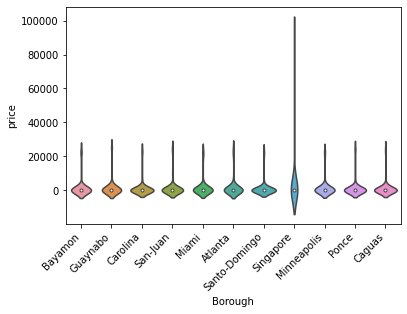

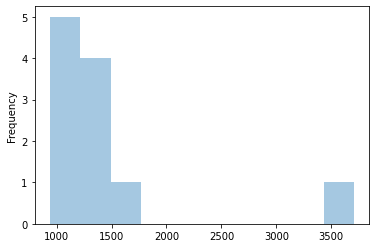

In [ ]:
# Violin plot
chart = sns.violinplot(x='Borough', y='price', data=df_cost_living_All)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
df_cost_living_All_grp = df_cost_living_All.groupby(['Borough']).mean()
df_cost_living_All_grp['Borough'] = df_cost_living_All_grp.index
plt.show()
df_cost_living_All_grp['price'].plot.hist(alpha=0.4)
pivot_table = pd.pivot_table(df_cost_living_All, values='price', index=['Borough'],
                    columns=['name'], aggfunc=np.sum)

In [ ]:
df_cost_living_All = df_cost_living_All.rename_axis(None)

pivot_table_Category = pd.pivot_table(df_cost_living_All, values='price', index=['Borough'],
                    columns=['category'], aggfunc=np.sum)

df_cost_living_All['data'] = df_cost_living_All.index


### Chart cost living by city [San Juan, Miami, Singapore, Minneapolis, etc]

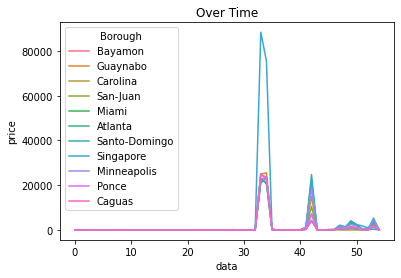

In [ ]:
data_chart = sns.lineplot(
    x="data",
    y="price",
    hue='Borough',
    data=df_cost_living_All
).set_title('Over Time')

[[8.14006375e+01 1.24427036e+03]
 [8.19595000e+04 3.70792727e+03]
 [2.28696400e+04 1.37633525e+03]
 [2.90213043e+03 1.65637644e+03]
 [1.63857143e+02 3.70792727e+03]
 [9.92775000e+03 1.19476755e+03]]


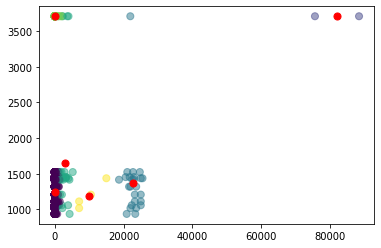

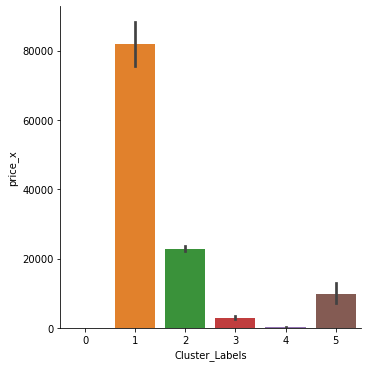

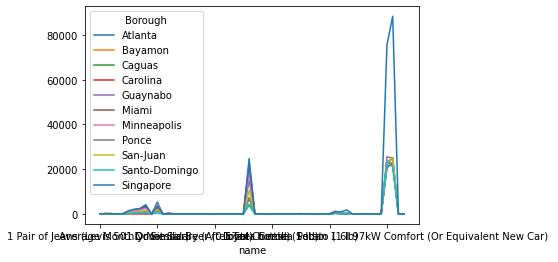

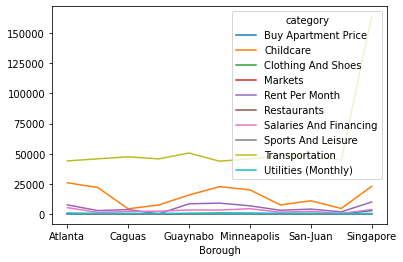

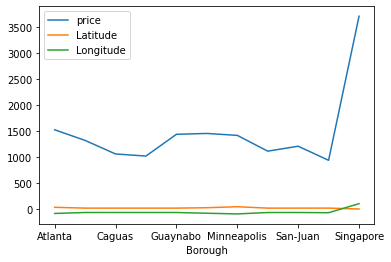

In [ ]:
df_cost_living_All.reset_index(inplace=True, drop=True)
df_cost_grp = df_cost_living_All.groupby(['Borough'])['price'].agg('mean')

df_cost_living_All.index = df_cost_living_All.Borough

df_cost_merge = pd.merge(df_cost_living_All, df_cost_grp, left_index=True, right_index=True)

#########################################

# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

# cluster  
kmeans = KMeans(n_clusters=6).fit(df_cost_merge[['price_x','price_y']])
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df_cost_merge['price_x'], df_cost_merge['price_y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

df_cost_merge['Cluster_Labels'] = kmeans.labels_

###############

sns.catplot(x='Cluster_Labels', y='price_x', data=df_cost_merge, kind='bar')

######################

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location = [latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

pivot_table.T.plot()

# Average Monthly Net Salary (After Tax) 

df_cost_living_all_filter = df_cost_living_All[df_cost_living_All.name == 'Average Monthly Net Salary (After Tax) ']

df_cost_living_all_Live_Cost = df_cost_living_All[df_cost_living_All.name != 'Average Monthly Net Salary (After Tax) ']


import seaborn as sns
tips = sns.load_dataset("tips")
#ax = sns.barplot(y="Borough", x="price", data=df_cost_living_all_filter)

df_cost_living_all_Live_Cost.index.name = None
df_cost_Live_Cost_grp = df_cost_living_all_Live_Cost.groupby(['Borough'])['price'].agg('sum')
# Chart by category
pivot_table_Category.plot()

##################################################

df_cost_living_All.index.name = None

df_cost_living_All_grp2 = df_cost_living_All.groupby(['category','Borough']).mean()

df_cost_living_All_grp['Borough'] = df_cost_living_All_grp.index

df_cost_living_All_grp.plot()

#df_cost_living_All_grp['price'].plot.hist(alpha=0.4)


df_cost_merge.index.name = None

df_cost_living_All_grp2 = df_cost_merge.groupby(['category','Borough']).mean()

In [ ]:
from folium.plugins import MarkerCluster
import folium.plugins as plugins

map_living_cost = folium.Map(location=[latitude, longitude], zoom_start=11)

title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format("Cluster Living Cost by Cities")   
 
map_living_cost.get_root().html.add_child(folium.Element(title_html))

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(map_living_cost)
# add markers to map
for lat, lng, label, ciudad, price in zip(df_cost_merge['Latitude'], df_cost_merge['Longitude'], df_cost_merge['name'], df_cost_merge['Borough'],  df_cost_merge.price_x.round().astype('str')):
    #print ('ciudad', ciudad)
    label = folium.Popup(ciudad + ' ' + label + ', $'  + price, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(incidents)  
    
map_living_cost


**bold text**
### Agregated Cost Map by City



In [ ]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

address = 'Miami, FL'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude


# create map
map_clusters = folium.Map(location = [latitude, longitude], zoom_start=2)

title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format("Average Cost by City")   
 
map_clusters.get_root().html.add_child(folium.Element(title_html))

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, price, cluster in zip(df_cost_living_All_grp2['Latitude'], df_cost_living_All_grp2['Longitude'], df_cost_living_All_grp2.index.get_level_values(1), df_cost_living_All_grp2.price_y.round().astype('str'), df_cost_living_All_grp2['Cluster_Labels'].astype('float')):
    label = folium.Popup(str(poi) + ' cost $' + str(price), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

[Text(0, 0, 'Adjuntas'),
 Text(0, 0, 'Aguada'),
 Text(0, 0, 'Aguadilla'),
 Text(0, 0, 'Aguas Buenas'),
 Text(0, 0, 'Aibonito'),
 Text(0, 0, 'Añasco'),
 Text(0, 0, 'Arecibo'),
 Text(0, 0, 'Arroyo'),
 Text(0, 0, 'Barceloneta'),
 Text(0, 0, 'Barranquitas'),
 Text(0, 0, 'Bayamón'),
 Text(0, 0, 'Cabo Rojo'),
 Text(0, 0, 'Caguas'),
 Text(0, 0, 'Camuy'),
 Text(0, 0, 'Canóvanas'),
 Text(0, 0, 'Carolina'),
 Text(0, 0, 'Cataño'),
 Text(0, 0, 'Cayey'),
 Text(0, 0, 'Ceiba'),
 Text(0, 0, 'Ciales'),
 Text(0, 0, 'Cidra'),
 Text(0, 0, 'Coamo'),
 Text(0, 0, 'Comerío'),
 Text(0, 0, 'Corozal'),
 Text(0, 0, 'Culebra'),
 Text(0, 0, 'Dorado'),
 Text(0, 0, 'Fajardo'),
 Text(0, 0, 'Florida'),
 Text(0, 0, 'Guánica'),
 Text(0, 0, 'Guayama'),
 Text(0, 0, 'Guayanilla'),
 Text(0, 0, 'Guaynabo'),
 Text(0, 0, 'Gurabo'),
 Text(0, 0, 'Hatillo'),
 Text(0, 0, 'Hormigueros'),
 Text(0, 0, 'Humacao'),
 Text(0, 0, 'Isabela'),
 Text(0, 0, 'Jayuya'),
 Text(0, 0, 'Juana Díaz'),
 Text(0, 0, 'Juncos'),
 Text(0, 0, 'Lajas'),
 Tex

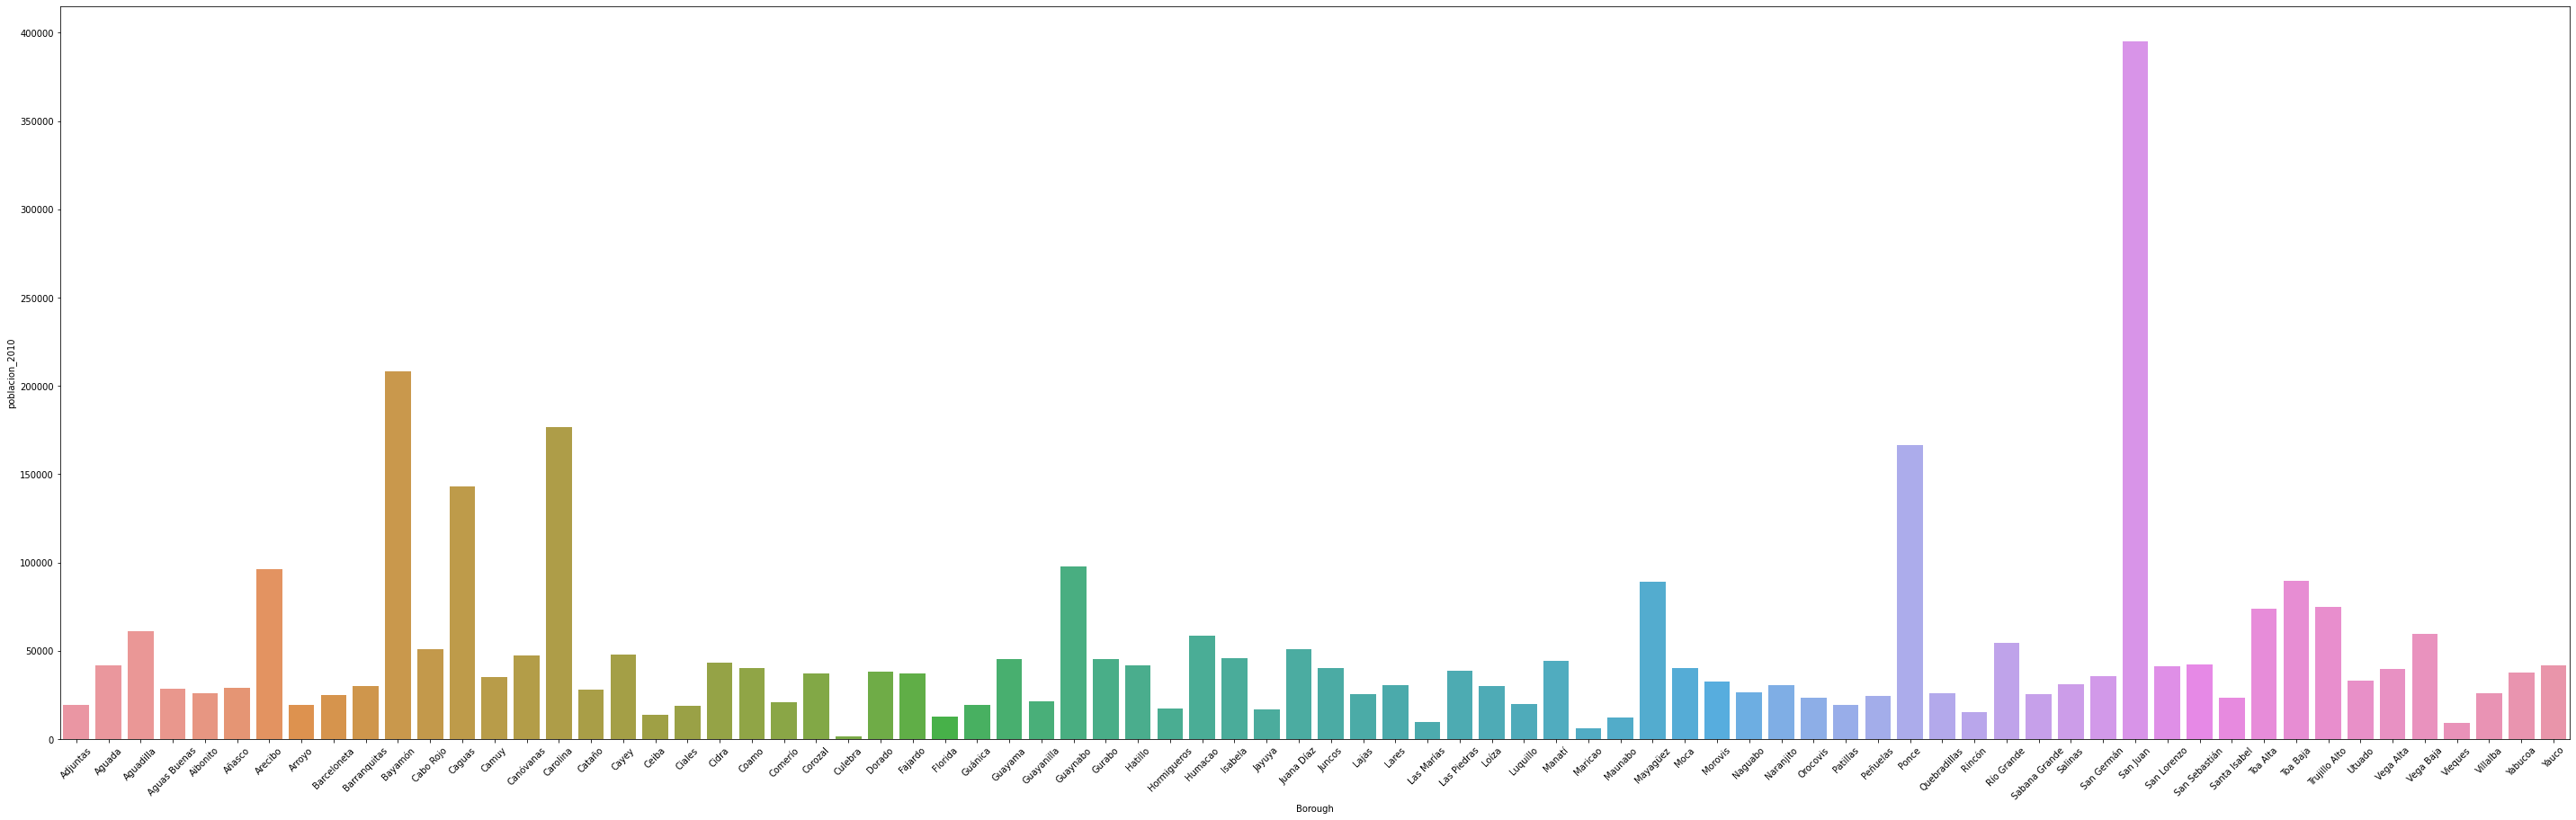

In [ ]:
url = "http://electionspuertorico.org/referencia/censo2010/"
    
dfs = pd.read_html(url,header=1)
df_poblation = dfs[2]
columns = ['Borough', 'poblacion_2010','poblacion_2000','cantidad', 'percent_of_change']
df_poblation.columns = columns
df_poblation = df_poblation[df_poblation.Borough != 'Total,  Puerto Rico']

plt.figure(figsize=(50,15))
chart = sns.barplot(x='Borough', y='poblacion_2010', data=df_poblation)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

### Puerto Rico Poblation 

In [ ]:
# Top 10 cities by poblation
df_poblation_above_mean = df_poblation.head(10)
df_poblation_above_mean = df_poblation_above_mean.sort_values(by='poblacion_2010', ascending=False)

[Text(0, 0, 'Arecibo'),
 Text(0, 0, 'Aguadilla'),
 Text(0, 0, 'Aguada'),
 Text(0, 0, 'Barranquitas'),
 Text(0, 0, 'Añasco'),
 Text(0, 0, 'Aguas Buenas'),
 Text(0, 0, 'Aibonito'),
 Text(0, 0, 'Barceloneta'),
 Text(0, 0, 'Arroyo'),
 Text(0, 0, 'Adjuntas')]

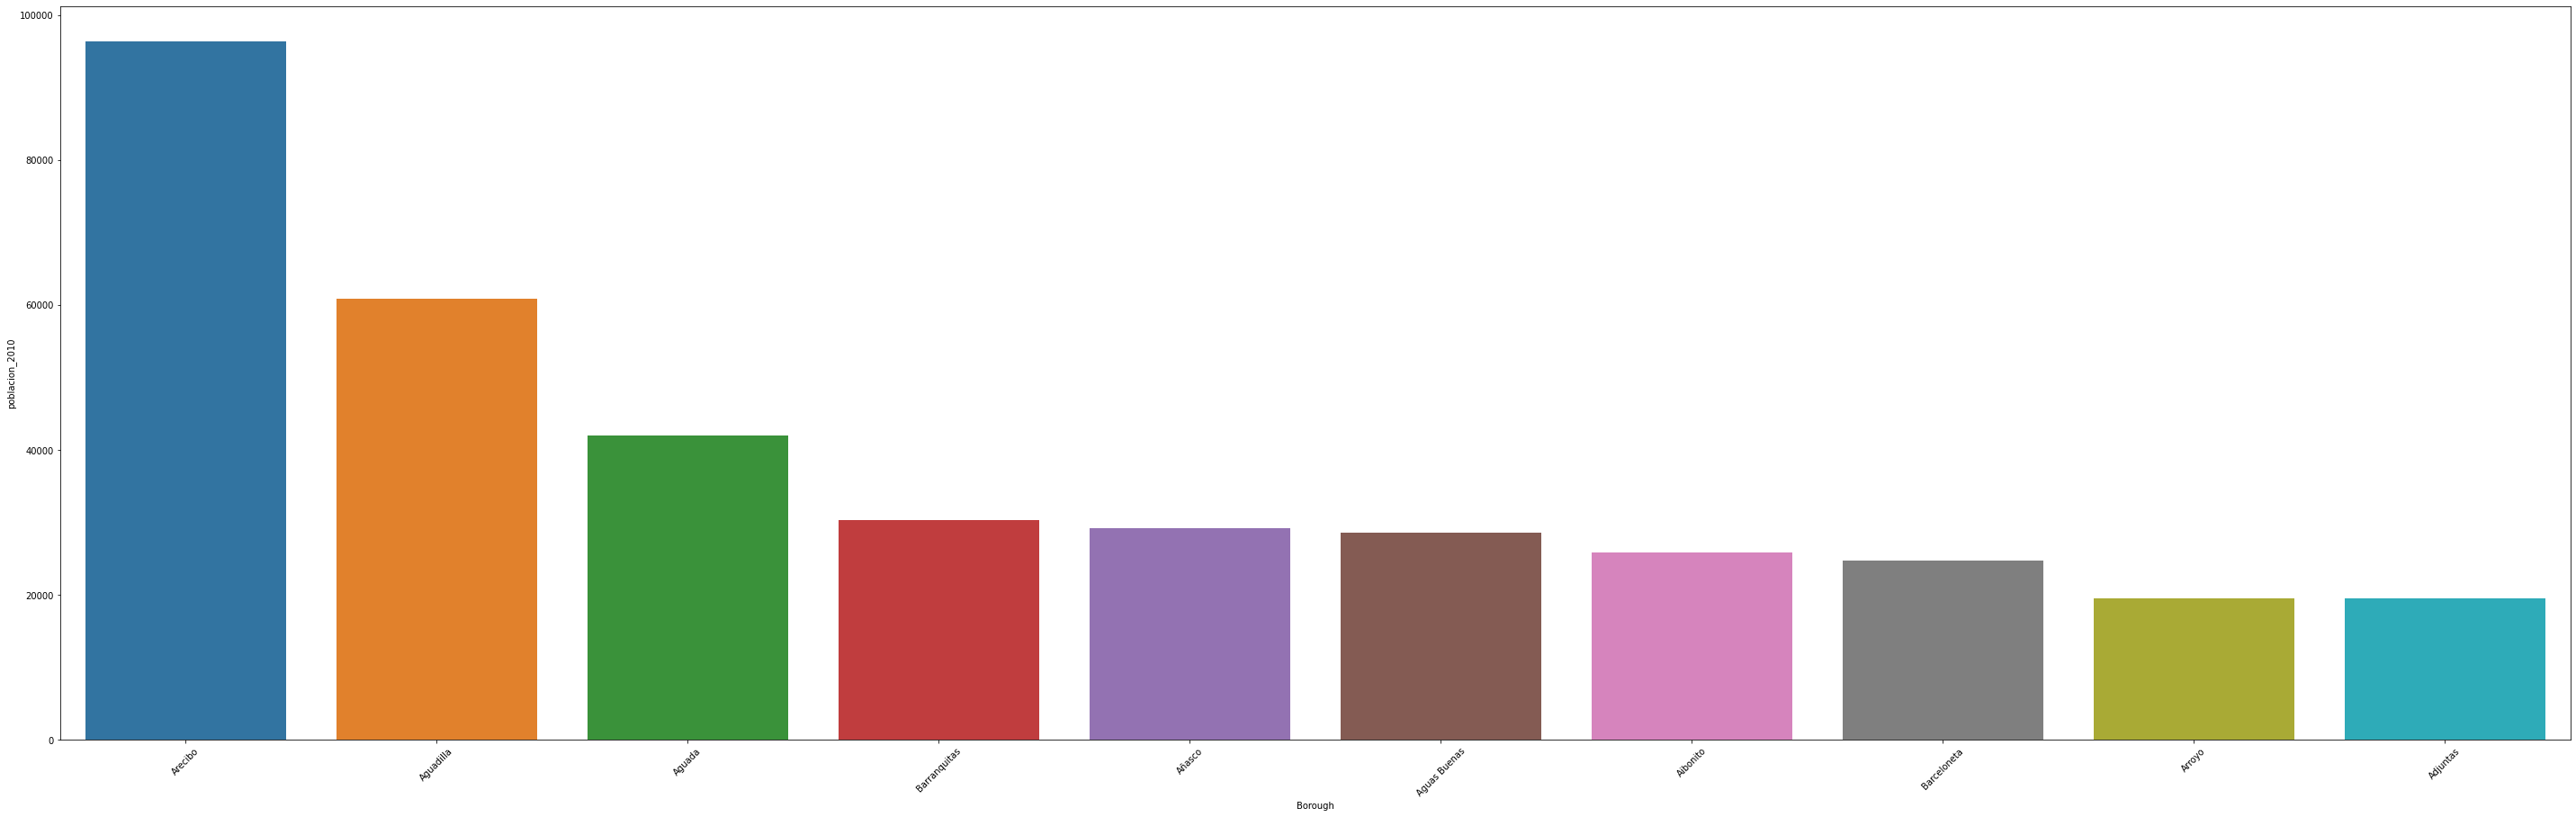

In [ ]:
plt.figure(figsize=(50,15))
chart = sns.barplot(x='Borough', y='poblacion_2010', data=df_poblation_above_mean)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [ ]:
#Table view of teh top 10 city by poblation
df_poblation_above_mean

,Borough,poblacion_2010,poblacion_2000,cantidad,percent_of_change
6,Arecibo,96440,100131,-3691,-3.7
2,Aguadilla,60949,64685,-3736,-5.8
1,Aguada,41959,42042,-83,-0.2
9,Barranquitas,30318,28909,"+1,409",4.9
5,Añasco,29261,28348,+913,3.2
3,Aguas Buenas,28659,29032,-373,-1.3
4,Aibonito,25900,26493,-593,-2.2
8,Barceloneta,24816,22322,"+2,494",11.2
7,Arroyo,19575,19117,+458,2.4
0,Adjuntas,19483,19143,+340,1.8


In [ ]:
df_appt_3beds_selected2 = df_info_appartments_with_address[df_info_appartments_with_address.beds >= 3]    
df_appt_3beds_selected2 = df_appt_3beds_selected2[df_appt_3beds_selected2.price < 3000]
df_appt_3beds_selected2.Borough.value_counts()

Caguas      2
Carolina    1
San Juan    1
Name: Borough, dtype: int64

In [ ]:
selected_city = 'Caguas'

df_info_appartments_with_address_selected = df_info_appartments_with_address[df_info_appartments_with_address.Borough == selected_city]
df_info_appartments_with_address_selected

df_appt_3beds_selected = df_info_appartments_with_address_selected[df_info_appartments_with_address_selected.beds >= 3]    
df_appt_3beds_selected = df_appt_3beds_selected[df_appt_3beds_selected.price < 3000]

df_appt_3beds_selected[['Borough', 'beds','baths', 'sqft','price','price_per_sqft','address','zipcode']]

,Borough,beds,baths,sqft,price,price_per_sqft,address,zipcode
8,Caguas,3.0,2.0,1816.0,1500.0,0.825991,C-303 Condominio Puertas Del Parque San Jose U...,00725
9,Caguas,3.0,2.0,1492.0,1250.0,0.837802,"400 Grand Blvd Los Prados Apt 9202, Caguas, PR...",00727


In [ ]:
df_gyms_selected = df_gyms_all[df_gyms_all.Borough == selected_city]
df_gyms_selected

,Gym,Borough,Latitude,Longitude
13,HCOA Fitness Caguas,Caguas,18.212942,-66.055884
14,Planet Fitness - Caguas,Caguas,18.212942,-66.055884
19,Evolv Fitness,Caguas,18.212942,-66.055884
21,Phyt New York,Caguas,18.212942,-66.055884


In [ ]:
# frequency count of the schools by Borough 
count_school = df_school_All['Borough'].value_counts() 
print(count_school) 

Carolina    54
Caguas      47
Bayamon     38
San-Juan    26
Name: Borough, dtype: int64


### See the collected information for the selected city: Caguas, PR

In [ ]:
df_jobs_selected = df_jobs_all[df_jobs_all.Borough == selected_city]
df_jobs_selected

,jobs,Borough
0,Application Engineer,Caguas
1,IT Project Manager and IT Business Systems Ana...,Caguas
2,IT Specialist -,Caguas
3,IT Business Analyst -,Caguas
4,Network Administrator -,Caguas
5,"IT Helpdesk Support (Call Center)- San Juan, PR",Caguas
7,Sr. IT Project Manager - Telecommunications an...,Caguas
8,Senior IT Operations Support & Compliance Spec...,Caguas
10,"Supervisor, Patient Access (Bilingual ENG/SPA)...",Caguas
11,Sr Engineer/ Vision Systems and Packaging Process,Caguas


In [ ]:
df_school_selected = df_school_All[df_school_All.Borough == selected_city]
df_school_selected

,Borough,school
0,Caguas,University Gardens (especializada)
1,Caguas,Julian E Blanco (ballet)
2,Caguas,Central Artes Visuales (especializada)
3,Caguas,Padre Rufo (bilingue)
4,Caguas,Juan Jose Osuna (espsecializada)
5,Caguas,Jose Julian Acosta (teatro)
6,Caguas,Ernesto Ramos Antonini (musica)
7,Caguas,Juan Antonio Corretjer
8,Caguas,Trina Padilla De Sanz
9,Caguas,Lcdo Guillermo Atiles Moreau


## Results and Discussion Section

The main goal of this project was to provided information to suggest a new city to move. The information to help with the recommendations including venues, appartments, schools, gym, jobs and cost of living near by. 

## Conclusion Section

This capstone project, is doing of k-means cluster using sklearn, providing a segmentation information into 5 clusters for the different Borough, neighborhood. For the visualization was provided several charts, maps and tables for the results. 

This project gave me the opportunity to applied concepts include the data retrieval from foursquare, data scraping and map visualization using Folium. 

# Future Steps

One of the encountered limitations was due the data retrieval using Venus rating using Follium the free account. Another of the liamitations is the available information select cities at Puerto Rico. Persue how to enhace the clustering unsupervised model features.